# TPC-C Multi-Tenant with Distributed PVC and Tuned PostgreSQL 17.5

* data is generated and loaded into databases in a distributed filesystem
* experiments do not use preloaded data

* PostgreSQL uses improved args:
```
# --- Connection & Worker Processes ---
- "-c"
- "max_connections=1500"       # https://www.postgresql.org/docs/current/runtime-config-connection.html#GUC-MAX-CONNECTIONS
- "-c"
- "max_worker_processes=128"   # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-WORKER-PROCESSES
- "-c"
- "max_parallel_workers=64"    # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-WORKERS
- "-c"
- "max_parallel_workers_per_gather=8"  # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-WORKERS-PER-GATHER
- "-c"
- "max_parallel_maintenance_workers=8" # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-MAINTENANCE-WORKERS

# --- Memory Settings ---
- "-c"
- "shared_buffers=256GB"       # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-SHARED-BUFFERS
- "-c"
- "effective_cache_size=350GB" # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-EFFECTIVE-CACHE-SIZE
- "-c"
- "work_mem=128MB"             # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-WORK-MEM
- "-c"
- "maintenance_work_mem=4GB"   # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAINTENANCE-WORK-MEM
- "-c"
- "temp_buffers=64MB"          # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-TEMP-BUFFERS
- "-c"
- "wal_buffers=16MB"           # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-BUFFERS
- "-c"
- "autovacuum_work_mem=1GB"    # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-WORK-MEM

# --- Autovacuum ---
- "-c"
- "autovacuum=on"                            # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM
- "-c"
- "autovacuum_max_workers=10"               # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-MAX-WORKERS
- "-c"
- "autovacuum_vacuum_cost_limit=1000"       # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-VACUUM-COST-LIMIT
- "-c"
- "vacuum_cost_limit=1000"                  # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-VACUUM-COST-LIMIT
- "-c"
- "autovacuum_naptime=15s"                  # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-NAPTIME
- "-c"
- "autovacuum_vacuum_cost_delay=20ms"       # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-VACUUM-COST-DELAY

# --- WAL & Checkpoints (Ceph-optimized) ---
- "-c"
- "wal_level=replica"                       # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-LEVEL
- "-c"
- "wal_compression=on"                      # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-COMPRESSION
- "-c"
- "wal_writer_delay=500ms"                  # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-WRITER-DELAY
- "-c"
- "commit_delay=10000"                      # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-COMMIT-DELAY
- "-c"
- "synchronous_commit=off"                  # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-SYNCHRONOUS-COMMIT
- "-c"
- "max_wal_size=2GB"                        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-MAX-WAL-SIZE
- "-c"
- "min_wal_size=1GB"                        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-MIN-WAL-SIZE
- "-c"
- "checkpoint_timeout=15min"                # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-CHECKPOINT-TIMEOUT
- "-c"
- "checkpoint_completion_target=0.9"        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-CHECKPOINT-COMPLETION-TARGET

# --- Planner Cost Tweaks (CephFS) ---
- "-c"
- "random_page_cost=4.0"                    # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-RANDOM-PAGE-COST
- "-c"
- "seq_page_cost=1.5"                       # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-SEQ-PAGE-COST
- "-c"
- "cpu_tuple_cost=0.01"                     # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-CPU-TUPLE-COST
- "-c"
- "effective_io_concurrency=2"              # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-EFFECTIVE-IO-CONCURRENCY
- "-c"
- "default_statistics_target=500"           # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-DEFAULT-STATISTICS-TARGET

# --- Locks and Limits ---
- "-c"
- "max_locks_per_transaction=128"           # https://www.postgresql.org/docs/current/runtime-config-locks.html#GUC-MAX-LOCKS-PER-TRANSACTION
- "-c"
- "max_pred_locks_per_transaction=128"      # https://www.postgresql.org/docs/current/runtime-config-locks.html#GUC-MAX-PRED-LOCKS-PER-TRANSACTION
- "-c"
- "max_stack_depth=7MB"                     # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-STACK-DEPTH
- "-c"
- "max_files_per_process=4000"              # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-FILES-PER-PROCESS

# --- Miscellaneous ---
- "-c"
- "huge_pages=try"                          # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-HUGE-PAGES
```

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
#import os
#import re
import matplotlib.pyplot as plt
#import pickle
from IPython.display import display, Markdown
import seaborn as sns
from math import floor
import ast
import json
import re
import numpy as np

#import dbmsbenchmarker
#import bexhoma
from bexhoma import evaluators

%matplotlib inline

In [2]:
path = r"C:\data\benchmarks"
#path = r"/home/perdelt/benchmarks"
filename_prefix = "pvc_qos_"

In [3]:
def get_workload(code):
    with open(path+"/"+code+"/queries.config",'r') as inp:
        workload_properties = ast.literal_eval(inp.read())
        return workload_properties


def get_performance_single(evaluation):
    df = evaluation.get_df_benchmarking()
    df = df.sort_values(['experiment_run', 'client'])
    return df

def get_performance(evaluation):
    df = evaluation.get_df_benchmarking()
    df = df.sort_values(['experiment_run', 'client'])
    result = df.groupby('client').agg({
        'Goodput (requests/second)': 'sum',
        'num_errors': 'sum',
        'Latency Distribution.Average Latency (microseconds)': 'mean',
        'Latency Distribution.99th Percentile Latency (microseconds)': 'max',
    }).reset_index()
    return result

def get_performance_all(codes):
    df_performance = pd.DataFrame()
    for code in codes:
        evaluation = evaluators.benchbase(code=code, path=path)
        workload = get_workload(code)
        df = get_performance(evaluation)
        df['type']=workload['tenant_per']
        df['num_tenants']=workload['num_tenants']
        #print(df)
        df_performance = pd.concat([df_performance, df])
    return df_performance

def get_performance_all_single(codes):
    df_performance = pd.DataFrame()
    for code in codes:
        evaluation = evaluators.benchbase(code=code, path=path)
        workload = get_workload(code)
        df = get_performance_single(evaluation)
        df['type']=workload['tenant_per']
        df['num_tenants']=workload['num_tenants']
        #print(df)
        df_performance = pd.concat([df_performance, df])
    return df_performance

def get_metrics(evaluation):
    with open(path+"/"+evaluation.code+"/connections.config",'r') as inf:
        connections = ast.literal_eval(inf.read())
        pretty_connections = json.dumps(connections, indent=2)
        #print(pretty_connections)
        connections_sorted = sorted(connections, key=lambda c: c['name'])
        result = dict()
        for c in connections_sorted:
            #print(c)
            for m, metric in c['monitoring']['metrics'].items():
                if m in result:
                    continue
                result[m] = {
                    'title': metric['title'],
                    'active': metric['active'] if 'active' in metric else 'True',
                    'type': metric['type'] if 'type' in metric else 'cluster',
                    'metric': metric['metric'] if 'metric' in metric else '',
                }
            #result[c['name']] = {
            #    'metrics': c['monitoring']['metrics'],
            #}
            #result[c['parameter']['connection_parameter']['loading_parameters']['BENCHBASE_TERMINALS']] = c['timeIngesting']
        df = pd.DataFrame(result).T
        return df#df['time_load'].max()

def get_loading_time_max(evaluation):
    with open(path+"/"+evaluation.code+"/connections.config",'r') as inf:
        connections = ast.literal_eval(inf.read())
        pretty_connections = json.dumps(connections, indent=2)
        #print(pretty_connections)
        connections_sorted = sorted(connections, key=lambda c: c['name'])
        result = dict()
        for c in connections_sorted:
            #print(c)
            result[c['name']] = {
                'time_load': c['timeLoad'],
                'time_ingest': c['timeIngesting'],
                'time_check': c['timeIndex'],
                'terminals': c['parameter']['connection_parameter']['loading_parameters']['BENCHBASE_TERMINALS'],
                #'target': c['parameter']['connection_parameter']['loading_parameters']['BENCHBASE_TARGET'],
                'pods': c['parameter']['parallelism'],
                'tenant': c['parameter']['TENANT'] if 'TENANT' in c['parameter'] else '',
                'client': c['parameter']['client'],
                'datadisk': c['hostsystem']['datadisk'],
            }
            #result[c['parameter']['connection_parameter']['loading_parameters']['BENCHBASE_TERMINALS']] = c['timeIngesting']
        df = pd.DataFrame(result).T
        return df#df['time_load'].max()

def get_loading_time_max_all(codes):
    df_performance = pd.DataFrame()
    for code in codes:
        evaluation = evaluators.benchbase(code=code, path=path)
        workload = get_workload(code)
        df = get_loading_time_max(evaluation)
        df['type']=workload['tenant_per']
        df['num_tenants']=workload['num_tenants']
        #print(df)
        df_performance = pd.concat([df_performance, df])
    return df_performance

def show_summary_monitoring_table(evaluate, component):
    df_metrics = get_metrics(evaluate) # not used by now
    #print(df_metrics)
    df_monitoring = list()
    ##########
    df = evaluate.get_monitoring_metric(metric='total_cpu_util_s', component=component)
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    #df = df.T.max().sort_index() - df.T.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["CPU [CPUs]"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='total_cpu_throttled', component=component)
    df = df.max().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["CPU Throttled"]
    #print(df_cleaned)
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='total_cpu_util', component=component)
    df = df.max().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Max CPU"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='total_cpu_memory', component=component)/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory')/1024
    df = df.max().sort_index()
    df_cleaned = pd.DataFrame(df).round(2)
    df_cleaned.columns = ["Max RAM [Gb]"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='total_cpu_memory_cached', component=component)/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Max RAM Cached [Gb]"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_locks_count', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Locks"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_locks_count_accessexclusivelock', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["pg_locks_count_accessexclusivelock"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_locks_count_accesssharelock', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["pg_locks_count_accesssharelock"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_locks_count_exclusivelock', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["pg_locks_count_exclusivelock"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_locks_count_rowexclusivelock', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["pg_locks_count_rowexclusivelock"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_locks_count_rowsharelock', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["pg_locks_count_rowsharelock"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_locks_count_sharelock', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["pg_locks_count_sharelock"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_locks_count_sharerowexclusivelock', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["pg_locks_count_sharerowexclusivelock"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_locks_count_shareupdateexclusivelock', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["pg_locks_count_shareupdateexclusivelock"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_locks_count_sireadlock', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["pg_locks_count_sireadlock"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_activity_count_active', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Active"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_activity_count_idle', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Idle"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_activity_count_idle_transaction', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Transactions Idle"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_activity_count_idle_transaction_aborted', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Transactions Aborted"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_database_blks_hit', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Block Hits"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_database_blks_read', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Block Reads"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_statio_user_tables_heap_blocks_read', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Heap Reads"]
    #print(df_cleaned)
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_statio_user_tables_heap_blocks_hit', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Heap Hits"]
    #print(df_cleaned)
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_bgwriter_checkpoint_sync_time_total', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Sync Time"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_bgwriter_checkpoint_write_time_total', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Write Time"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='cache_hit_ratio', component=component)*100.
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Cache Hit Ratio [%]"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_user_tables_autoanalyze_count', component=component)*100.
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Number Autoanalyze"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_user_tables_autovacuum_count', component=component)*100.
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Number Autovacuum"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    return df_monitoring


def get_monitoring_timeseries_single(code, metric='pg_locks_count', component="stream"):
    evaluate = evaluators.benchbase(code=code, path=path)
    df = evaluate.get_monitoring_metric(metric=metric, component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    #df = df.mean().sort_index()
    #df_cleaned = pd.DataFrame(df)
    #df_cleaned.columns = ["Locks"]
    return df#_cleaned


def get_monitoring_stream_single(evaluation):
    df_monitoring = show_summary_monitoring_table(evaluation, "stream")
    if len(df_monitoring) > 0:
        #print("\n### Stream SUT")
        df = pd.concat(df_monitoring, axis=1).round(2)
        df = df.reindex(index=evaluators.natural_sort(df.index))
        # If your DataFrame is named df and the index is a string like 'PostgreSQL-1-1-1024-0-1'
        df = df.copy()  # avoid modifying original
        df['client'] = df.index.str.rsplit('-', n=1).str[-1]
        #print(df)
        return df

def get_monitoring(evaluation, type="stream"):
    df_monitoring = show_summary_monitoring_table(evaluation, type)
    if len(df_monitoring) > 0:
        #print("\n### Stream SUT")
        df = pd.concat(df_monitoring, axis=1).round(2)
        df = df.reindex(index=evaluators.natural_sort(df.index))
        # If your DataFrame is named df and the index is a string like 'PostgreSQL-1-1-1024-0-1'
        df = df.copy()  # avoid modifying original
        df['client'] = df.index.str.rsplit('-', n=1).str[-1]
        #print(df)
        result = df.groupby('client').agg({
            'CPU [CPUs]': 'sum',
            'Max RAM [Gb]': 'sum',
            'Max RAM Cached [Gb]': 'sum',
            'Max CPU': 'sum',
            'CPU Throttled': 'sum',
            'Locks': 'sum',
            'pg_locks_count_accessexclusivelock': 'sum',
            'pg_locks_count_accesssharelock': 'sum',
            'pg_locks_count_exclusivelock': 'sum',
            'pg_locks_count_rowexclusivelock': 'sum',
            'pg_locks_count_rowsharelock': 'sum',
            'pg_locks_count_sharelock': 'sum',
            'pg_locks_count_sharerowexclusivelock': 'sum',
            'pg_locks_count_shareupdateexclusivelock': 'sum',
            'pg_locks_count_sireadlock': 'sum',
            'Active': 'sum',
            'Idle': 'sum',
            'Transactions Idle': 'sum',
            'Transactions Aborted': 'sum',
            'Block Hits': 'sum',
            'Block Reads': 'sum',
            'Heap Reads': 'sum',
            'Heap Hits': 'sum',
            'Sync Time': 'sum',
            'Write Time': 'sum',
            'Number Autoanalyze': 'sum',
            'Number Autovacuum': 'sum',
            'Cache Hit Ratio [%]': 'mean',
        }).reset_index()
        return result

def get_monitoring_stream(evaluation):
    return get_monitoring(evaluation, type="stream")

def get_monitoring_all(codes, type="stream"):
    df_performance = pd.DataFrame()
    for code in codes:
        evaluation = evaluators.benchbase(code=code, path=path)
        workload = get_workload(code)
        df = get_monitoring(evaluation, type)
        df['type']=workload['tenant_per']
        df['num_tenants']=workload['num_tenants']
        #print(df)
        df_performance = pd.concat([df_performance, df])
    return df_performance

def get_monitoring_stream_all(codes):
    return get_monitoring_all(codes, type="stream")


In [4]:
def sanitize_filename(title, max_length=100):
    # Replace non-alphanumeric characters with underscores
    safe = re.sub(r'[^a-zA-Z0-9-_]+', '_', title.strip())
    # Truncate to a safe length
    return safe[:max_length].rstrip('_')
    
def plot_bars(df, y, title, estimator):
    df_plot = df.copy()
    #df_plot = df_plot[df_plot['client']=='1']
    df_plot = df_plot.sort_values(['num_tenants','type'])
    # Hatch styles for each type
    hatch_map = {
        'container': '/',
        'database': '\\',
        'schema': 'x'
    }
    hue_order = ['container', 'database', 'schema']
    # Create the plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=df_plot,
        x='num_tenants',
        y=y,
        hue='type',
        estimator=estimator,
        palette='Set2',
        hue_order=hue_order
    )
    show_height = False
    if show_height:
        for bar in ax.patches:
            height = bar.get_height()
            if height > 0:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,  # X: center of bar
                    height,                             # Y: top of bar
                    f'{height:.1f}',                    # Text (1 decimal place)
                    ha='center', va='bottom', fontsize=8
                )
    # Get tick positions (i.e., the x-axis categories)
    xticks = ax.get_xticks()
    bar_width = ax.patches[0].get_width()
    # Create a mapping from (num_tenants, type) to hatch
    grouped = df_plot.groupby(['num_tenants', 'type']).agg({y: estimator}).reset_index()
    #print(grouped)
    grouped_dict = {(row['num_tenants'], row['type']): hatch_map[row['type']] for _, row in grouped.iterrows()}
    bars = sorted(ax.patches, key=lambda bar: bar.get_x() if bar.get_height() > 0 else 10000)
    for bar, (_, row) in zip(bars, grouped.iterrows()):
        bar.my_id = (row['num_tenants'], row['type'])  # or anything else like an index or uuid
        bar.set_hatch(hatch_map[row['type']]) #grouped_dict[(bar.my_id)])
        bar.set_edgecolor('black')
        bar.set_linewidth(1)
    handles, labels = ax.get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        hatch = hatch_map.get(label, '')
        handle.set_hatch(hatch)
    # Final touches
    plt.legend(title='Type')
    ax.legend(fontsize=18)
    #ax.legend(fontsize=18, loc='upper left', bbox_to_anchor=(1, 1))  # move outside
    plt.title(f"{title}", fontsize=24)
    #plt.title(f"{title} by Number of Tenants and Type", fontsize=24)
    plt.xlabel("Number of Tenants", fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    # Remove y-axis label
    ax.set_ylabel('')  # or ax.set(ylabel='')
    plt.tight_layout()
    filename = "tpcc_" + filename_prefix + sanitize_filename(title) + ".png"    
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()



In [5]:
def plot_boxplots(df, y, title):
    plt.figure(figsize=(10, 6))
    # Hatch styles for each type
    hatch_map = {
        'container': '/',
        'database': '\\',
        'schema': 'x'
    }
    hue_order = ['container', 'database', 'schema']
    
    # Plot boxplots grouped by num_tenants and colored by type
    ax = sns.boxplot(
        data=df,
        x='num_tenants',
        y=y,#'Goodput (requests/second)',
        hue='type',
        palette='Set2'  # consistent colors per type
    )
    # Add vertical separator lines between groups
    # Get the number of unique num_tenants and type
    num_groups = df['num_tenants'].nunique()
    num_types = df['type'].nunique()
    
    # Extract hue order
    hue_order = ax.get_legend_handles_labels()[1]
    num_hue = len(hue_order)
    
    # Get hue order from seaborn (types)
    _, type_order = ax.get_legend_handles_labels()
    num_types = len(type_order)
    
    #print(len(ax.patches))
    # Set hatches correctly: patches are grouped by x then by hue
    for i, patch in enumerate(ax.patches):
        #print(i)
        type_index = i // (num_groups)
        if type_index >= num_types:
            break
        type_name = type_order[type_index]
        patch.set_hatch(hatch_map.get(type_name, ''))
        #print(hatch_map.get(type_name, ''))
        patch.set_edgecolor('black')
        patch.set_linewidth(1)
    
    # Each num_tenants group has num_types boxes
    for i in range(1, num_groups):
        xpos = i - 0.5 #0.5
        ax.axvline(x=xpos, color='gray', linestyle='--', alpha=0.5)
    
    
    # Update legend with matching hatches
    handles, labels = ax.get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        hatch = hatch_map.get(label, '')
        handle.set_hatch(hatch)
        handle.set_edgecolor('black')
        handle.set_linewidth(1)
    
    #title = "Goodput [req/s] Distribution per Tenant"
    plt.title(title, fontsize=24)
    plt.xlabel("Number of Tenants")
    plt.ylabel("")#"Goodput (requests/second)")
    plt.xlabel("Number of Tenants", fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    plt.legend(title="Type")
    ax.legend(fontsize=18)
    plt.tight_layout()
    filename = "tpcc_" + filename_prefix + sanitize_filename(title) + ".png"    
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

# Results

In [6]:
codes = [
    # container
    '1752781605', #tenants=1
    '1752771848', #tenants=2
    '1752788905', #tenants=3
    #'1752822230', #tenants=4
    #'1752635448', #tenants=3
    #'1752572699', #tenants=9
    #'1752464472', #tenants=10

    # database
    '1752779069', #tenants=1
    '1752765688', #tenants=2
    '1752785972', #tenants=3
    '1752796488', #tenants=4
    #'1752716922', #tenants=3
    #'1752724799', #tenants=4
    #'1752464472', #tenants=10

    #schema
    '1752776554', #tenants=1
    '1752762747', #tenants=2
    '1752816364', #tenants=3
    '1752793398', #tenants=4
    #'1752630091', #tenants=3
    #'1752565302', #tenants=9
    #'1752537927', #tenants=10

]

codes

['1752781605',
 '1752771848',
 '1752788905',
 '1752779069',
 '1752765688',
 '1752785972',
 '1752796488',
 '1752776554',
 '1752762747',
 '1752816364',
 '1752793398']

<Axes: >

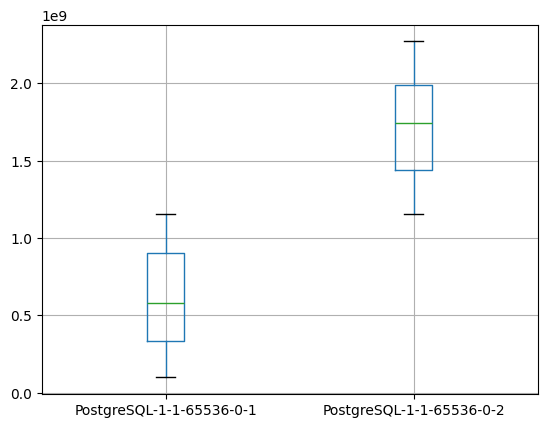

In [7]:
metric = 'pg_stat_database_blks_hit'
#metric = 'pg_stat_database_blks_reads'
#metric = 'pg_stat_activity_count_idle_transaction'
code = codes[0]
df_monitoring = get_monitoring_timeseries_single(code, metric=metric)

#df_monitoring.plot(title=metric)
df_monitoring.boxplot()


<Axes: title={'center': 'pg_locks_count_rowexclusivelock'}>

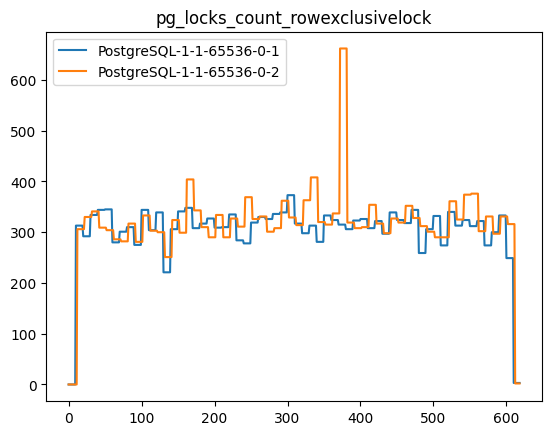

In [8]:
metric = 'pg_stat_database_blks_hit'
metric = 'pg_stat_activity_count_idle_transaction'
metric = 'pg_locks_count_rowexclusivelock'
code = codes[0]
df_monitoring = get_monitoring_timeseries_single(code, metric=metric)

df_monitoring.plot(title=metric)


In [9]:
df_performance = get_monitoring_all(codes, "stream")
#df_performance = df_performance[df_performance['client'] == '1']
df_performance.T

,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
client,1,2,1,2,1,2,1,2,1,2,...,1,2,1,2,1,2,1,2,1,2
CPU [CPUs],13041.33,13421.22,22243.48,20971.46,20849.0,21092.24,10215.9,12645.91,12357.37,11890.59,...,13726.78,15182.43,10619.66,10524.92,10184.0,9544.04,9939.38,13498.73,18693.79,16566.56
Max RAM [Gb],10.86,14.59,20.24,24.93,27.48,32.21,10.0,13.34,13.01,16.1,...,18.6,22.39,10.12,12.86,12.78,14.56,14.78,18.58,20.0,23.77
Max RAM Cached [Gb],24.11,33.65,45.54,52.13,48.92,58.79,20.35,30.9,27.99,33.35,...,37.0,43.06,20.4,28.26,25.01,28.32,29.31,37.07,40.19,46.56
Max CPU,27.47,26.71,39.36,38.79,39.0,39.0,19.37,23.94,28.51,27.67,...,33.23,31.22,22.76,21.22,21.62,17.95,25.43,26.7,36.84,32.69
CPU Throttled,0.01,0.0,39.19,39.8,97.2,97.29,0.0,0.0,14.99,15.01,...,42.13,32.52,0.01,0.0,10.66,7.98,22.13,28.75,56.56,43.04
Locks,868.29,915.43,1769.35,1730.29,2620.14,2598.19,917.59,887.32,1827.12,1832.79,...,3548.28,3552.05,921.1,933.2,1558.2,1573.37,2691.67,2756.8,3535.89,3504.98
pg_locks_count_accessexclusivelock,2.58,3.07,5.63,4.5,6.5,6.63,3.18,2.97,4.46,4.77,...,6.44,6.5,2.72,3.09,3.17,4.2,5.79,5.74,6.89,6.7
pg_locks_count_accesssharelock,276.8,292.95,573.18,552.66,840.64,835.4,294.79,286.26,587.17,587.46,...,1129.81,1133.2,296.8,300.24,500.43,504.11,855.59,879.23,1124.8,1112.35
pg_locks_count_exclusivelock,21.53,19.73,41.7,42.22,63.76,64.42,20.39,19.73,42.41,41.92,...,84.44,83.56,20.23,20.85,35.26,36.72,63.8,61.9,85.03,84.05


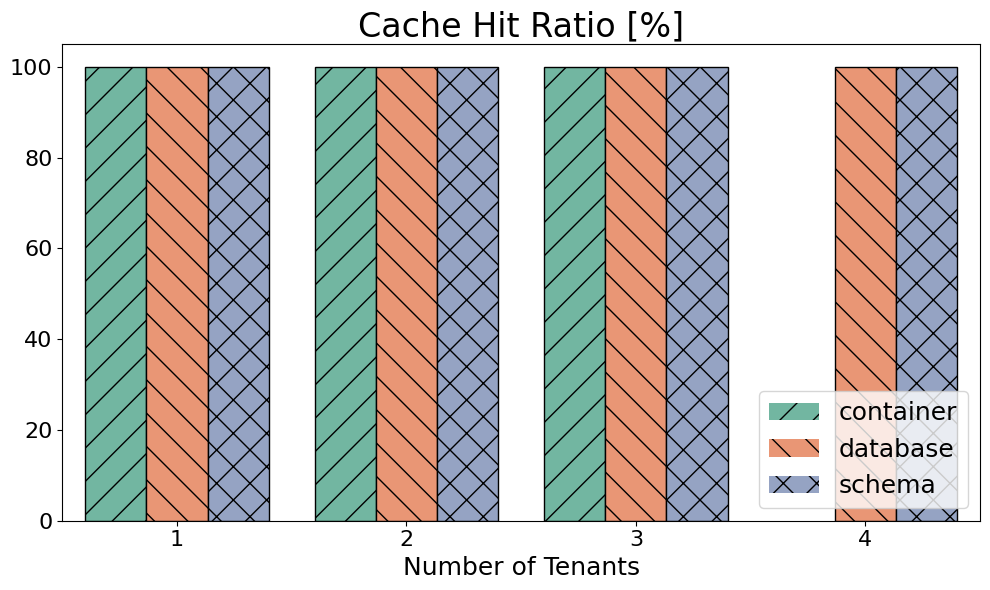

In [10]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_bars(df_performance.fillna(0), y='Cache Hit Ratio [%]', title='Cache Hit Ratio [%]', estimator='min')
#plot_boxplots(df, y='Block Hits', title='Block Hits')

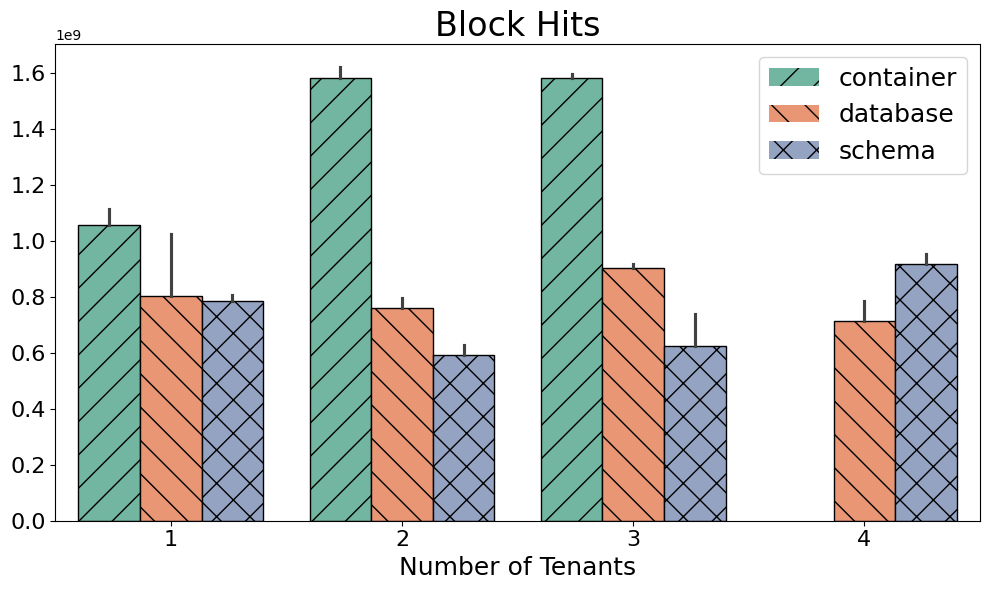

In [11]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_bars(df_performance, y='Block Hits', title='Block Hits', estimator='min')
#plot_boxplots(df, y='Block Hits', title='Block Hits')

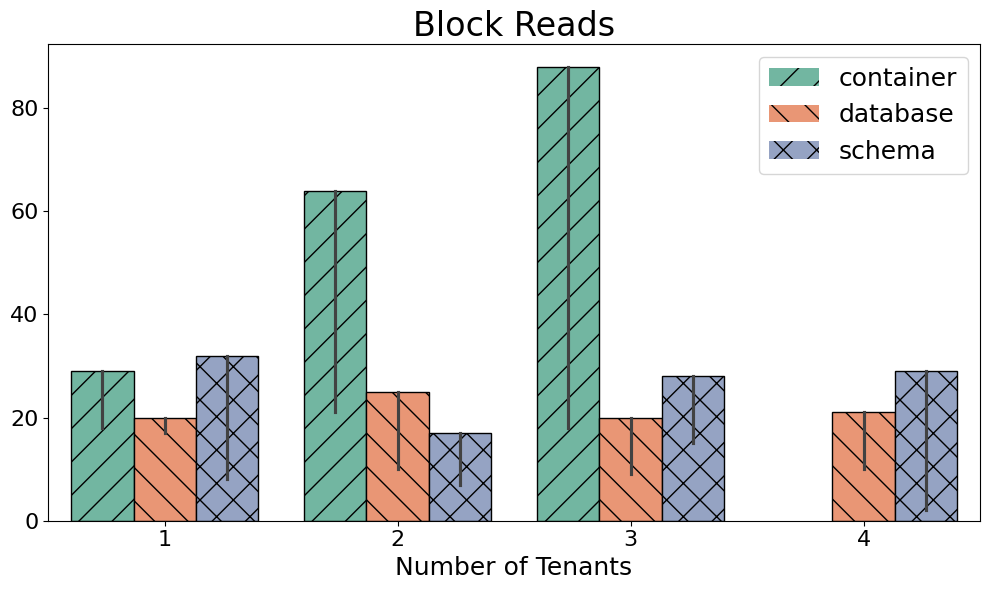

In [12]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Block Reads', title='Block Reads')
plot_bars(df_performance, y='Block Reads', title='Block Reads', estimator='max')

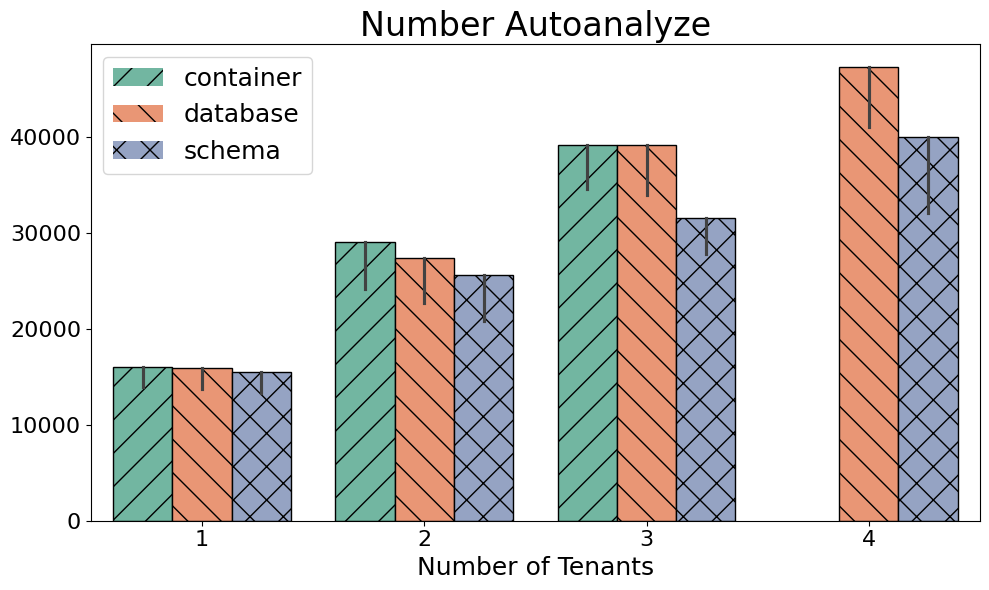

In [13]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_bars(df_performance, y='Number Autoanalyze', title='Number Autoanalyze', estimator='max')
#plot_boxplots(df, y='Block Hits', title='Block Hits')

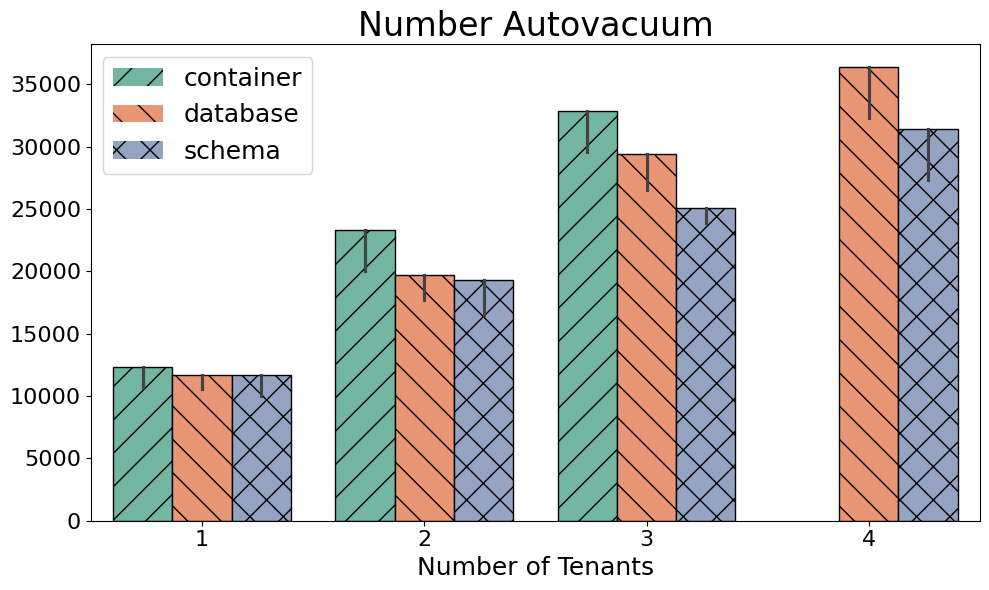

In [14]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_bars(df_performance, y='Number Autovacuum', title='Number Autovacuum', estimator='max')
#plot_boxplots(df, y='Block Hits', title='Block Hits')

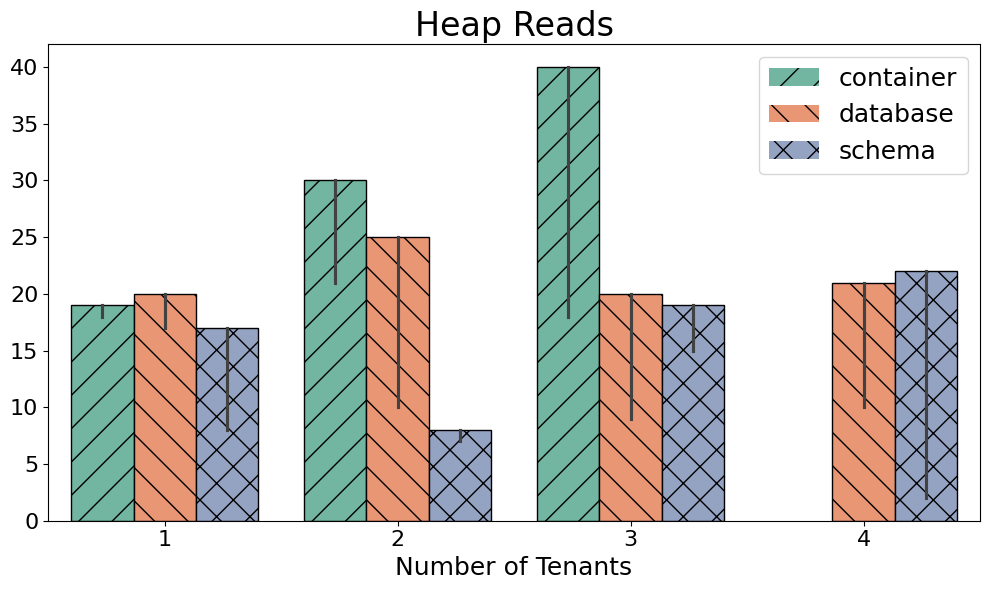

In [15]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Heap Reads', title='Heap Reads')
plot_bars(df_performance, y='Heap Reads', title='Heap Reads', estimator='max')

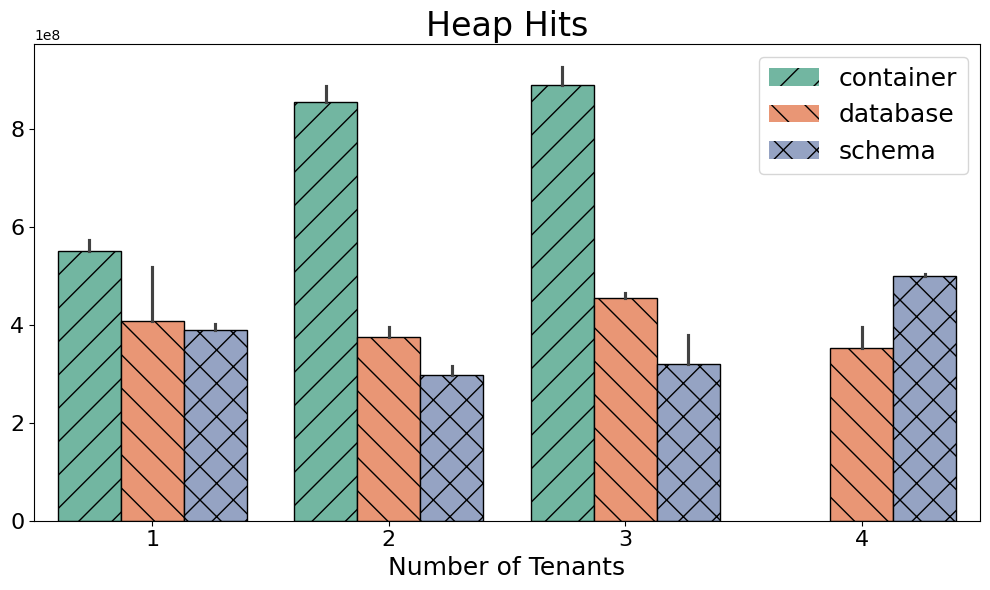

In [16]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Heap Reads', title='Heap Reads')
plot_bars(df_performance, y='Heap Hits', title='Heap Hits', estimator='min')

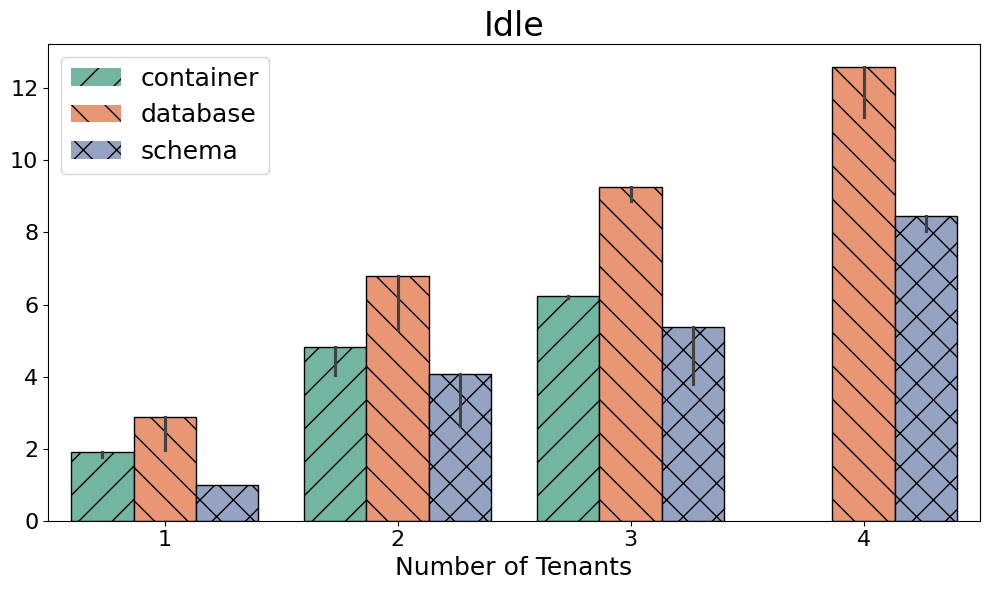

In [17]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Idle', title='Idle')
plot_bars(df_performance, y='Idle', title='Idle', estimator='max')

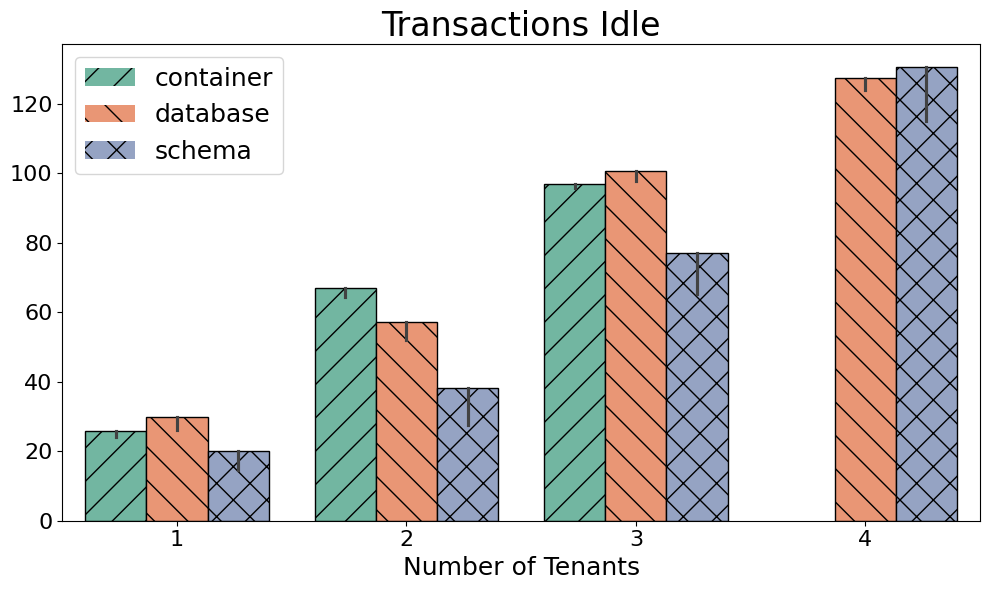

In [18]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Transactions Idle', title='Transactions Idle')
plot_bars(df_performance, y='Transactions Idle', title='Transactions Idle', estimator='max')

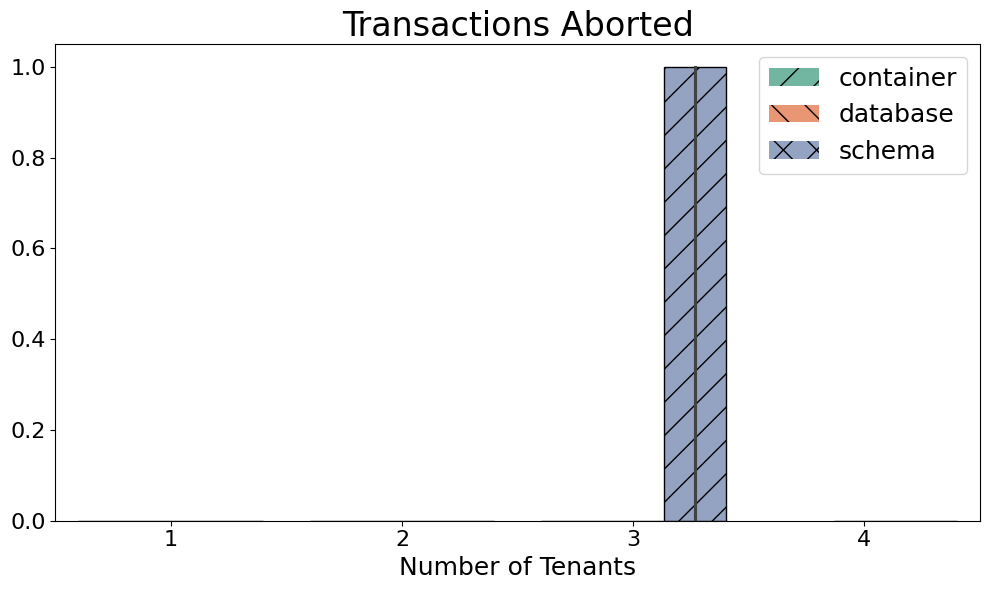

In [19]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Transactions Aborted', title='Transactions Aborted')
plot_bars(df_performance, y='Transactions Aborted', title='Transactions Aborted', estimator='max')

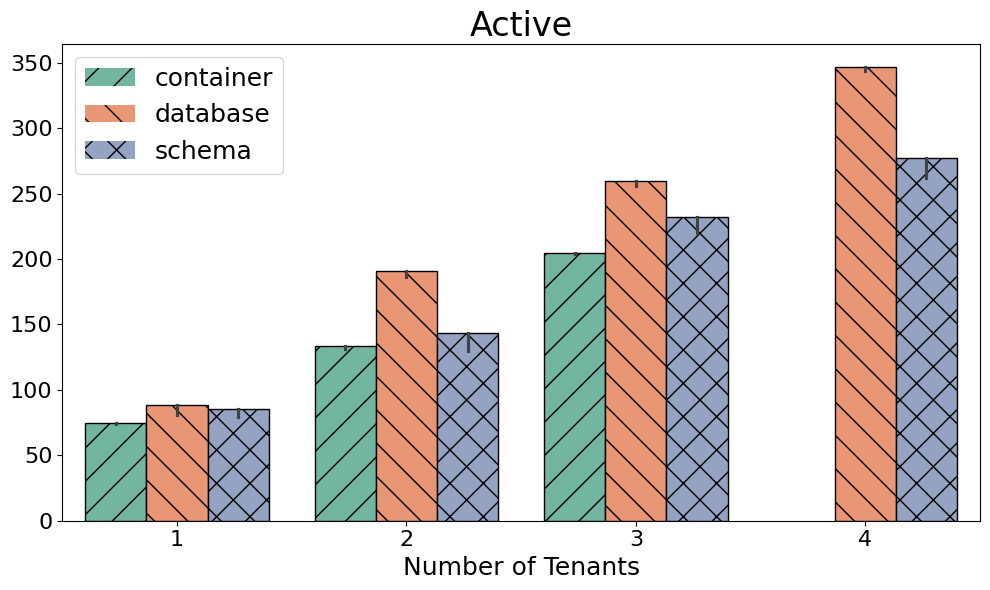

In [20]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Active', title='Active')
plot_bars(df_performance, y='Active', title='Active', estimator='max')

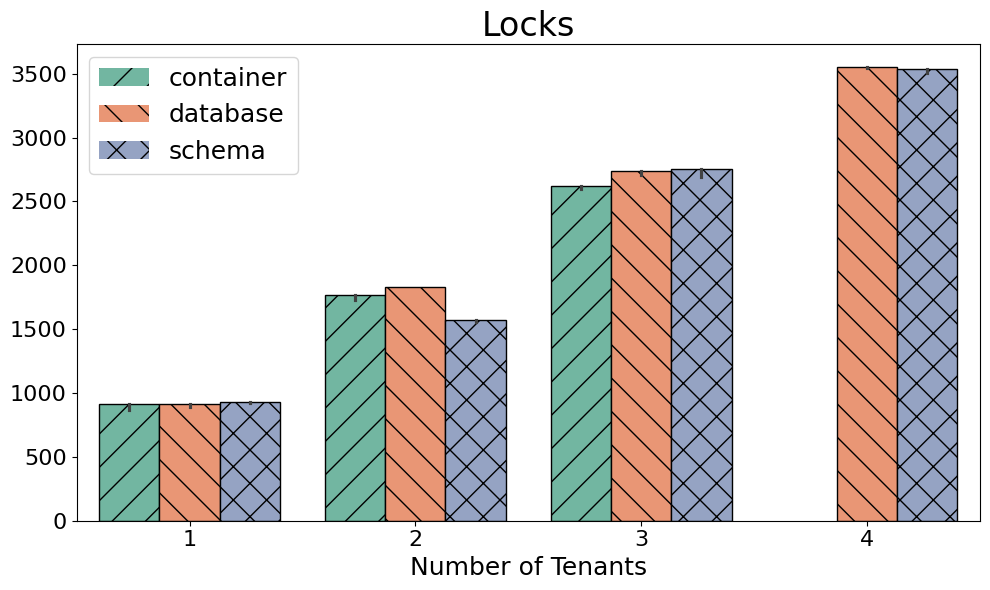

In [21]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Locks', title='Locks')
plot_bars(df_performance, y='Locks', title='Locks', estimator='max')

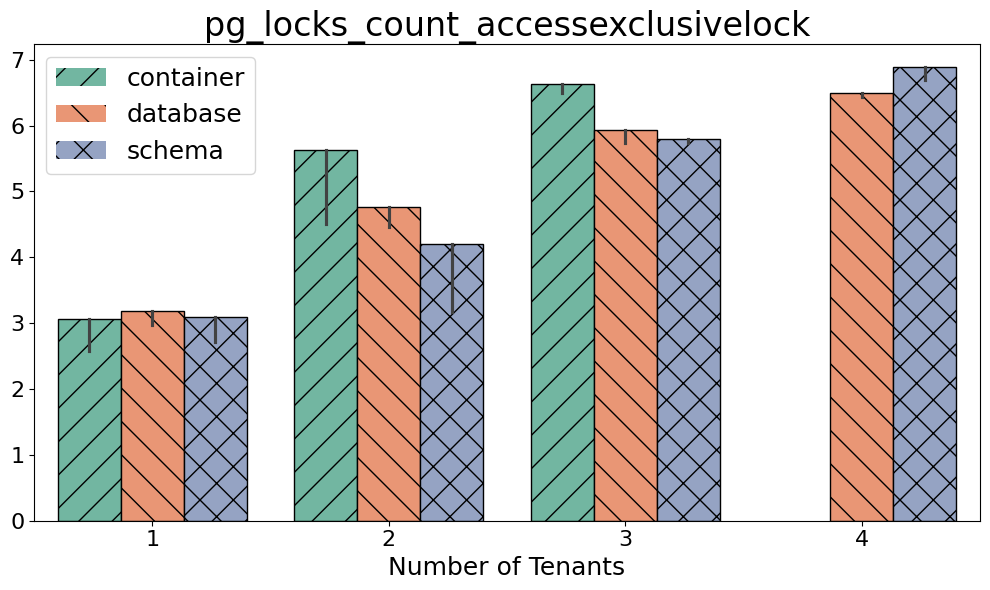

In [22]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Locks', title='Locks')
plot_bars(df_performance, y='pg_locks_count_accessexclusivelock', title='pg_locks_count_accessexclusivelock', estimator='max')

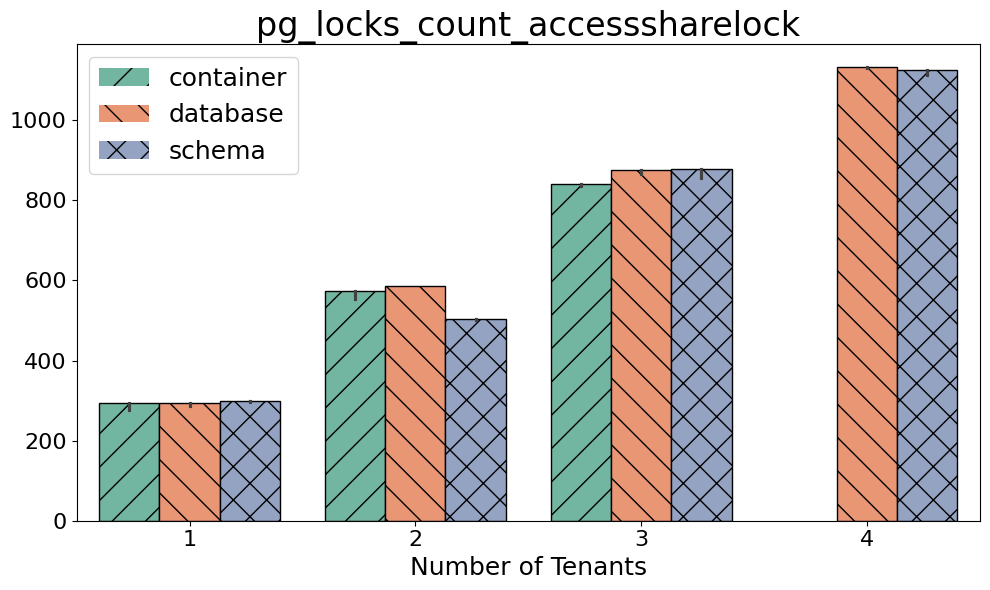

In [23]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Locks', title='Locks')
plot_bars(df_performance, y='pg_locks_count_accesssharelock', title='pg_locks_count_accesssharelock', estimator='max')

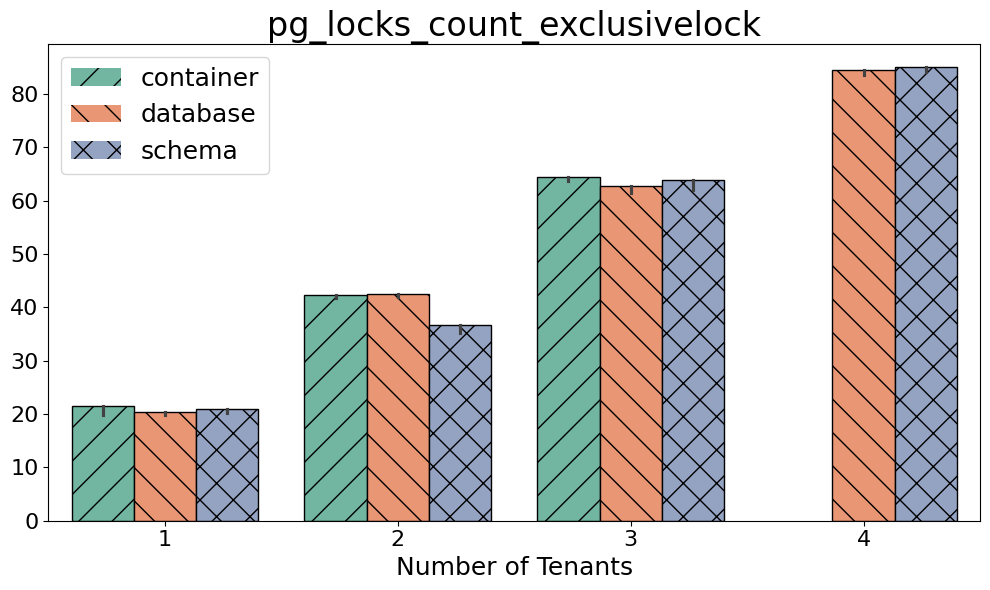

In [24]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Locks', title='Locks')
plot_bars(df_performance, y='pg_locks_count_exclusivelock', title='pg_locks_count_exclusivelock', estimator='max')

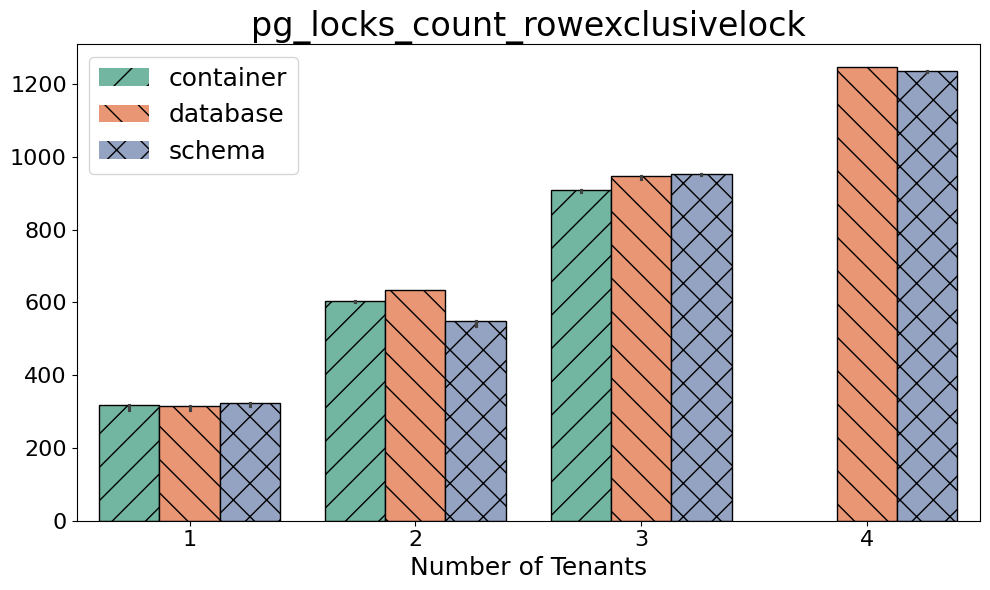

In [25]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Locks', title='Locks')
plot_bars(df_performance, y='pg_locks_count_rowexclusivelock', title='pg_locks_count_rowexclusivelock', estimator='max')

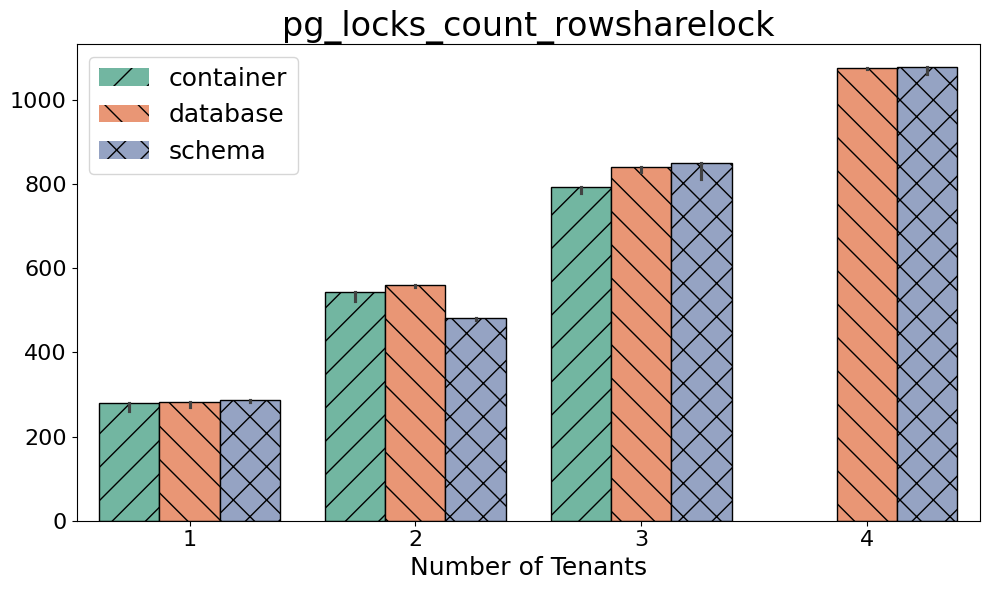

In [26]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Locks', title='Locks')
plot_bars(df_performance, y='pg_locks_count_rowsharelock', title='pg_locks_count_rowsharelock', estimator='max')

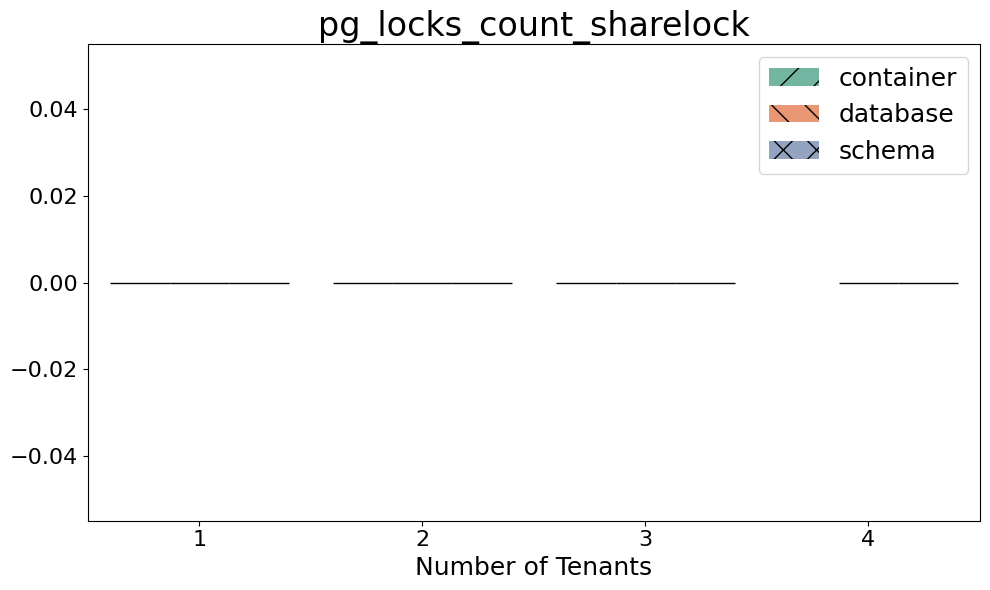

In [27]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Locks', title='Locks')
plot_bars(df_performance, y='pg_locks_count_sharelock', title='pg_locks_count_sharelock', estimator='max')

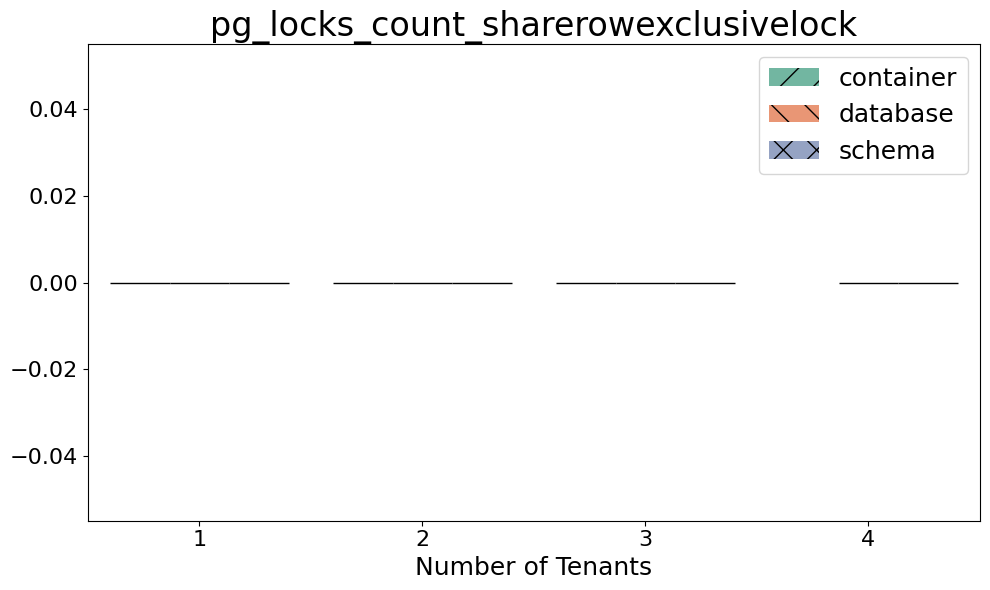

In [28]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Locks', title='Locks')
plot_bars(df_performance, y='pg_locks_count_sharerowexclusivelock', title='pg_locks_count_sharerowexclusivelock', estimator='max')

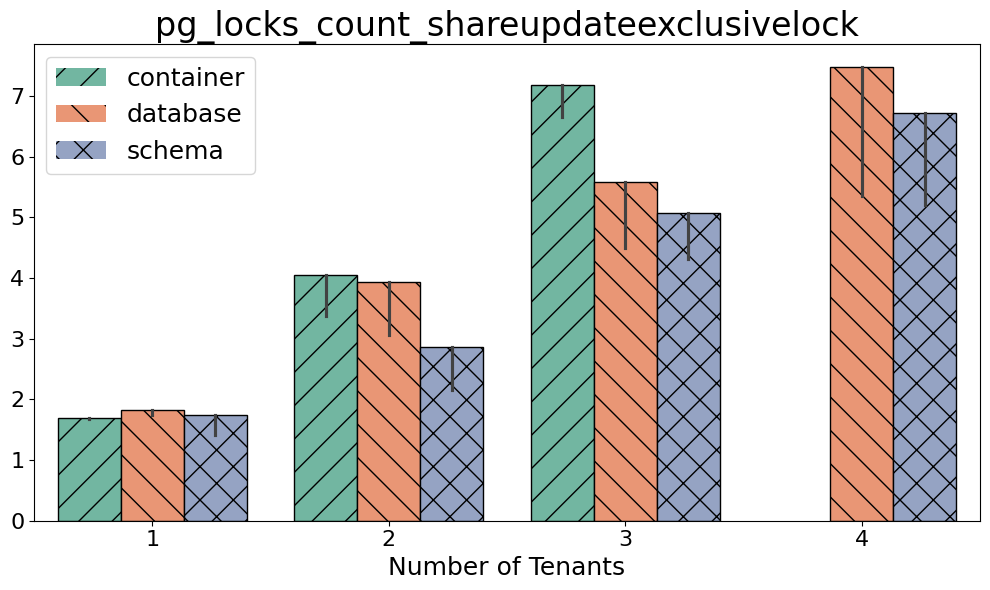

In [29]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Locks', title='Locks')
plot_bars(df_performance, y='pg_locks_count_shareupdateexclusivelock', title='pg_locks_count_shareupdateexclusivelock', estimator='max')

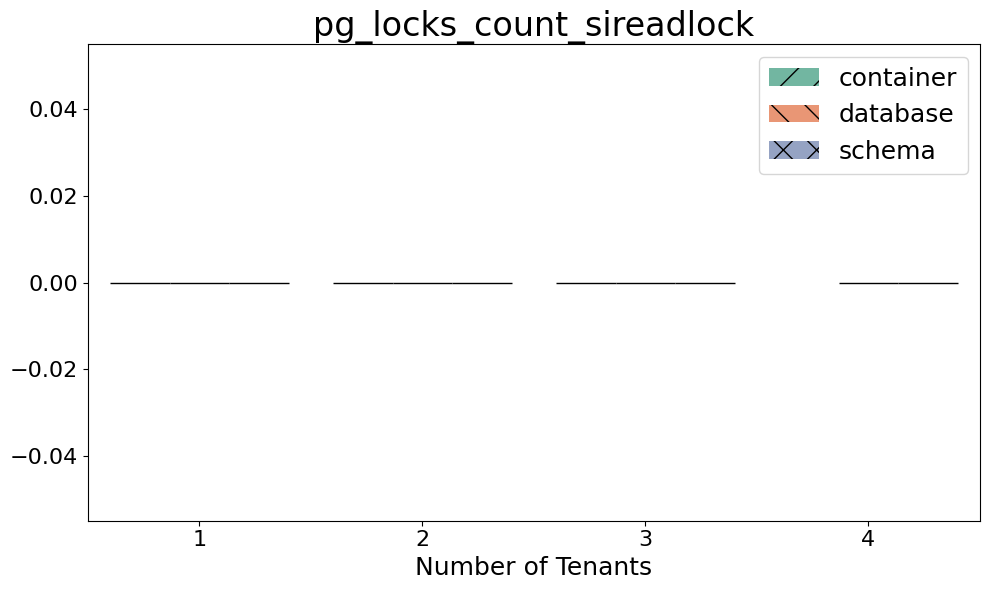

In [30]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Locks', title='Locks')
plot_bars(df_performance, y='pg_locks_count_sireadlock', title='pg_locks_count_sireadlock', estimator='max')

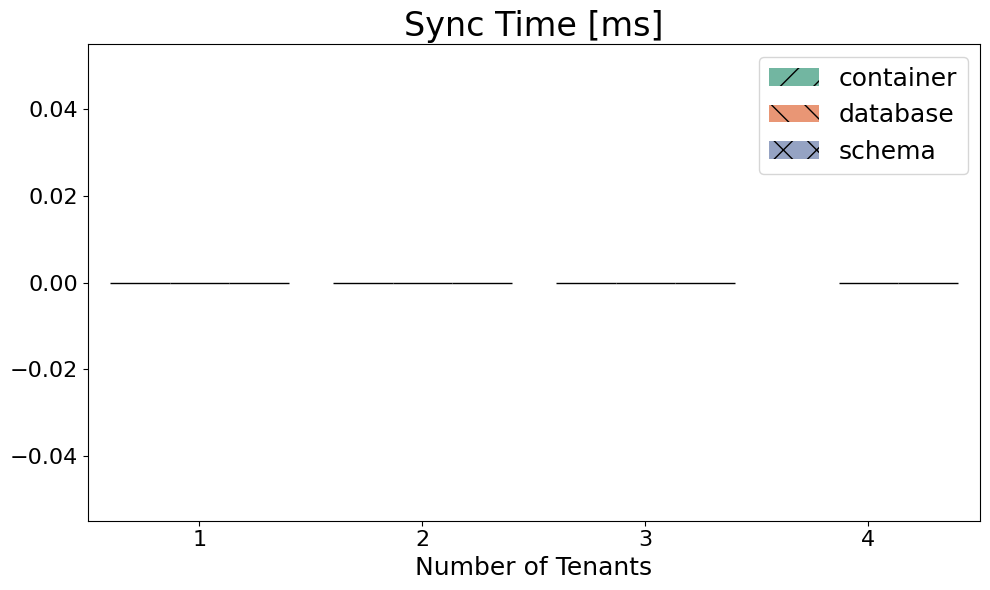

In [31]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Sync Time', title='Sync Time [ms]')
plot_bars(df_performance, y='Sync Time', title='Sync Time [ms]', estimator='max')

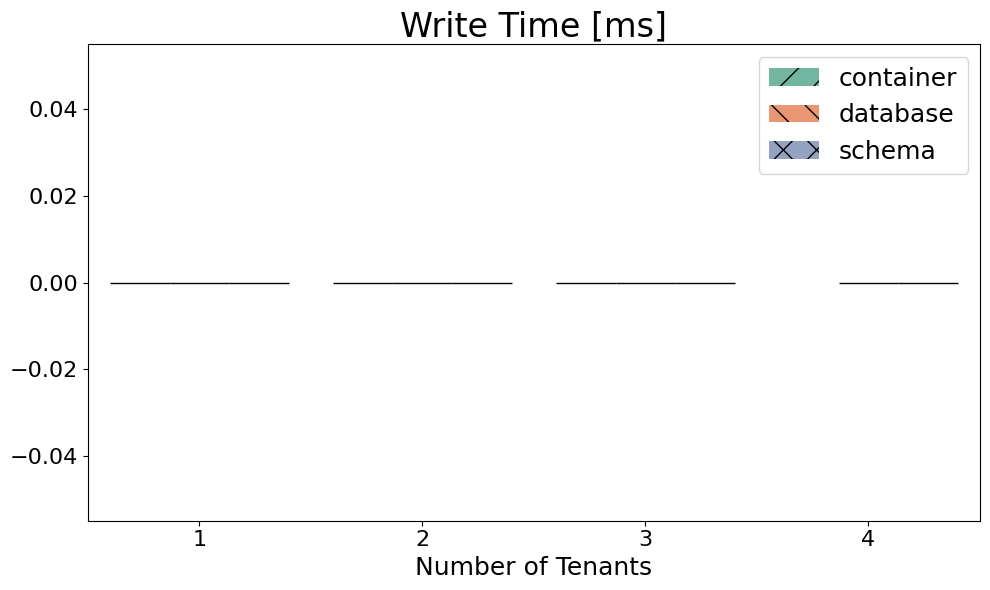

In [32]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Write Time', title='Write Time [ms]')
plot_bars(df_performance, y='Write Time', title='Write Time [ms]', estimator='max')

In [33]:
df_performance = get_performance_all_single(codes)
df_performance

,connection,configuration,experiment_run,client,pod,pod_count,bench,profile,target,time,...,Latency Distribution.Maximum Latency (microseconds),Latency Distribution.Median Latency (microseconds),Latency Distribution.Minimum Latency (microseconds),Latency Distribution.25th Percentile Latency (microseconds),Latency Distribution.90th Percentile Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),Latency Distribution.75th Percentile Latency (microseconds),Latency Distribution.Average Latency (microseconds),type,num_tenants
connection_pod,,,,,,,,,,,,,,,,,,,,,
PostgreSQL-1-1-65536-0-1-1,PostgreSQL-1-1-65536-0-1,PostgreSQL-1-1-65536-0,1,1,rt76v.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,2259812,9730,615,7070,19686,196150,13075,15753,container,1
PostgreSQL-1-1-65536-0-2-1,PostgreSQL-1-1-65536-0-2,PostgreSQL-1-1-65536-0,1,2,7xwtv.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,2109065,9639,572,7018,19326,132481,12926,15040,container,1
PostgreSQL-1-1-65536-0-1-1,PostgreSQL-1-1-65536-0-1,PostgreSQL-1-1-65536-0,1,1,vl82v.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,2073847,12243,554,8319,51662,91304,23252,21835,container,2
PostgreSQL-1-1-65536-1-1-1,PostgreSQL-1-1-65536-1-1,PostgreSQL-1-1-65536-1,1,1,8jf89.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,2021405,12120,608,8220,50241,90413,22597,21755,container,2
PostgreSQL-1-1-65536-0-2-1,PostgreSQL-1-1-65536-0-2,PostgreSQL-1-1-65536-0,1,2,h4g22.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,2416282,12300,523,8374,52291,94091,23571,22677,container,2
PostgreSQL-1-1-65536-1-2-1,PostgreSQL-1-1-65536-1-2,PostgreSQL-1-1-65536-1,1,2,5xxk2.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,2397059,12333,600,8343,50647,92420,23296,22330,container,2
PostgreSQL-1-1-65536-0-1-1,PostgreSQL-1-1-65536-0-1,PostgreSQL-1-1-65536-0,1,1,w2lzj.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,3106626,13232,590,8477,79895,174487,69093,35076,container,3
PostgreSQL-1-1-65536-1-1-1,PostgreSQL-1-1-65536-1-1,PostgreSQL-1-1-65536-1,1,1,s87fp.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,2963395,12961,631,8372,80923,177168,69916,34941,container,3
PostgreSQL-1-1-65536-2-1-1,PostgreSQL-1-1-65536-2-1,PostgreSQL-1-1-65536-2,1,1,pn9x2.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,2412363,15046,680,9700,80880,174580,69322,36719,container,3


## Per Tenant

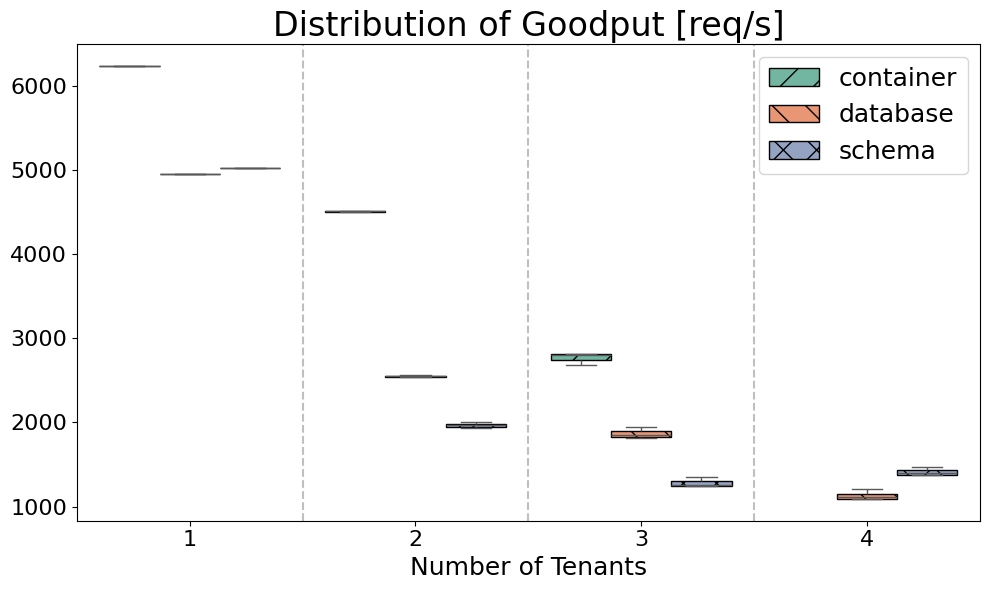

In [34]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_boxplots(df, y='Goodput (requests/second)', title='Distribution of Goodput [req/s]')

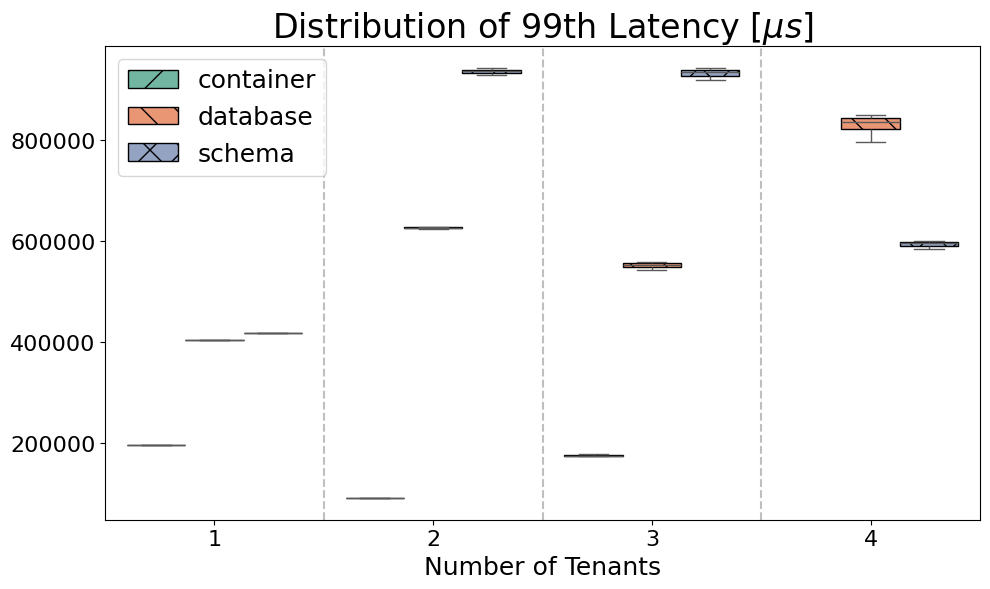

In [35]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_boxplots(df, y='Latency Distribution.99th Percentile Latency (microseconds)', title='Distribution of 99th Latency [$\mu s$]')


## Per Total

In [36]:
df_performance = get_performance_all(codes)
df_performance

,client,Goodput (requests/second),num_errors,Latency Distribution.Average Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),type,num_tenants
0,1,6237.663313,104,15753.000000,196150,container,1
1,2,6531.671431,134,15040.000000,132481,container,1
0,1,9019.097884,195,21795.000000,91304,container,2
1,2,8735.512692,162,22503.500000,94091,container,2
0,1,8294.404559,169,35578.666667,177168,container,3
1,2,8272.002796,189,35675.666667,178318,container,3
0,1,4958.168146,95,19811.000000,404564,database,1
1,2,6102.711316,128,16100.000000,214743,database,1
0,1,5098.092846,91,38551.500000,628400,database,2
1,2,4686.638069,115,41942.000000,677183,database,2


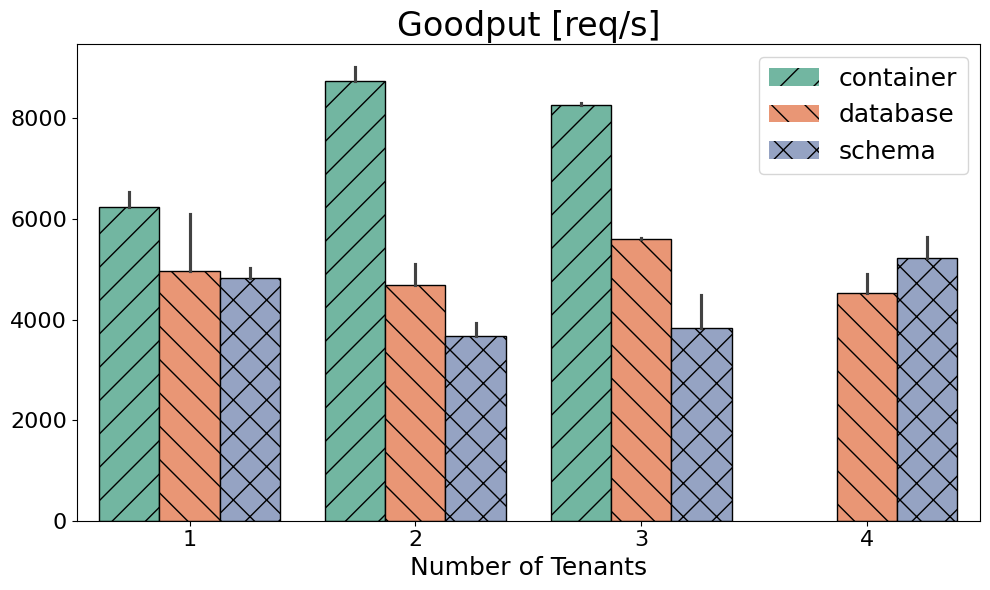

In [37]:
plot_bars(df_performance, y='Goodput (requests/second)', title='Goodput [req/s]', estimator='min')

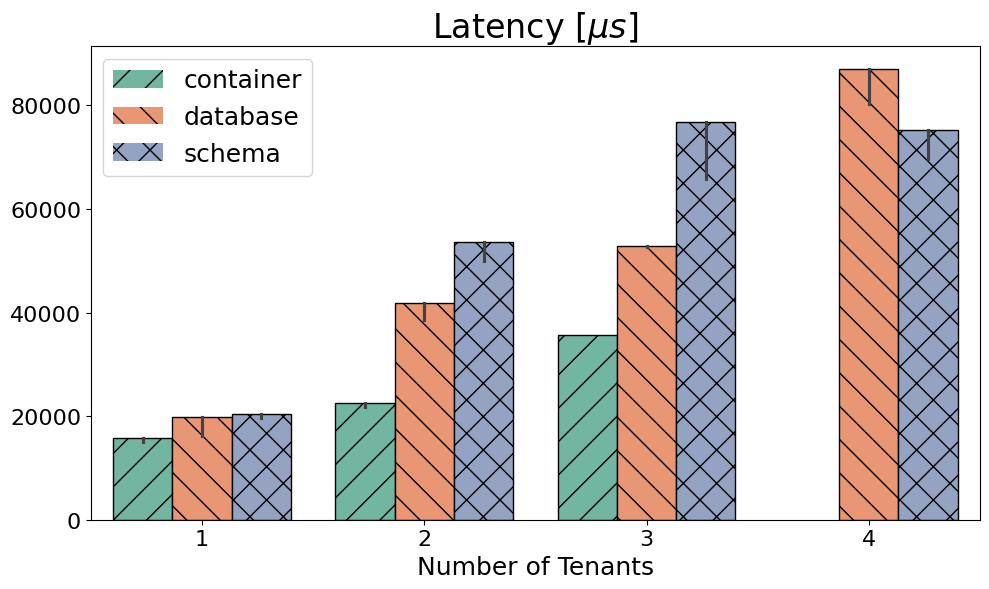

In [38]:
plot_bars(df_performance, y='Latency Distribution.Average Latency (microseconds)', title='Latency [$\mu s$]', estimator='max')

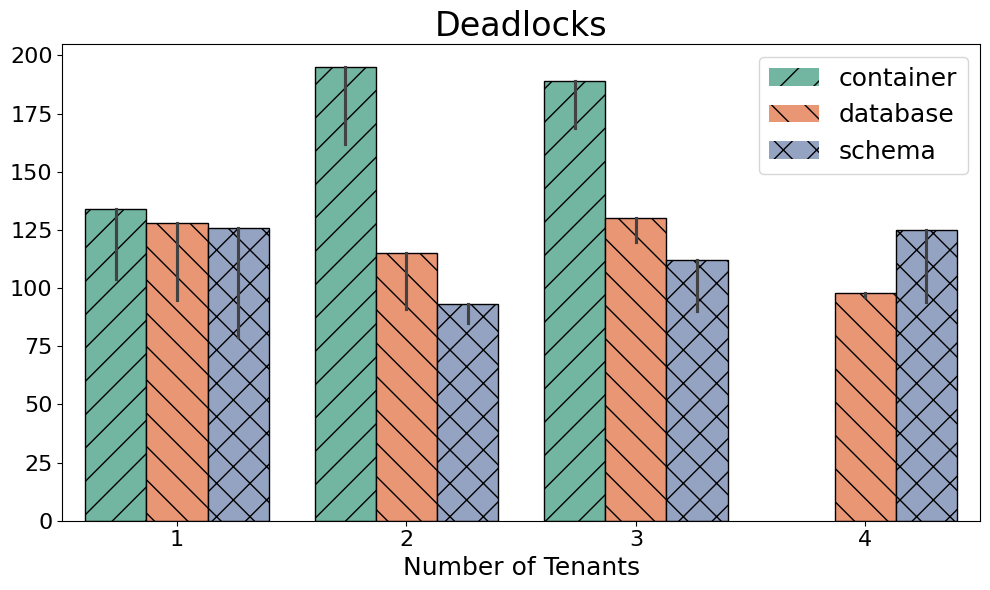

In [39]:
plot_bars(df_performance, y='num_errors', title='Deadlocks', estimator='max')

In [40]:
df_performance = get_loading_time_max_all(codes)
df_performance

,time_load,time_ingest,time_check,terminals,pods,tenant,client,datadisk,type,num_tenants
PostgreSQL-1-1-65536-0-1,336.0,96.0,224.0,1,1,0,1,3025,container,1
PostgreSQL-1-1-65536-0-2,336.0,96.0,224.0,1,1,0,2,7256,container,1
PostgreSQL-1-1-65536-0-1,504.0,132.0,359.0,1,1,0,1,3024,container,2
PostgreSQL-1-1-65536-0-2,504.0,132.0,359.0,1,1,0,2,5502,container,2
PostgreSQL-1-1-65536-1-1,489.0,143.0,328.0,1,1,1,1,2945,container,2
PostgreSQL-1-1-65536-1-2,489.0,143.0,328.0,1,1,1,2,5488,container,2
PostgreSQL-1-1-65536-0-1,664.0,110.0,536.0,1,1,0,1,3057,container,3
PostgreSQL-1-1-65536-0-2,664.0,110.0,536.0,1,1,0,2,4759,container,3
PostgreSQL-1-1-65536-1-1,637.0,119.0,502.0,1,1,1,1,3056,container,3
PostgreSQL-1-1-65536-1-2,637.0,119.0,502.0,1,1,1,2,4747,container,3


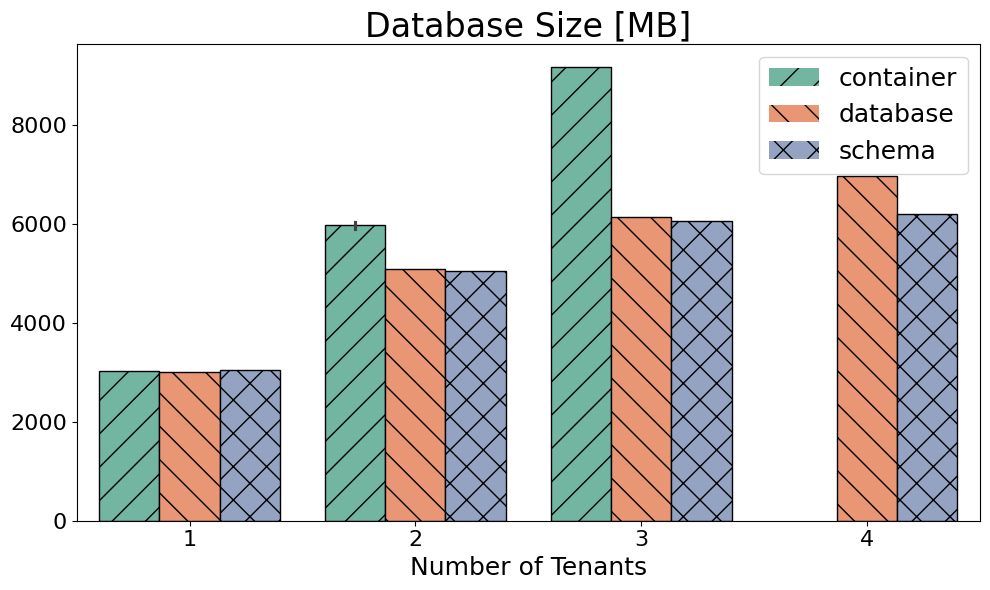

In [41]:
df_performance_first = df_performance[df_performance['client'] == '1']
plot_bars(df_performance_first, y='datadisk', title='Database Size [MB]', estimator='sum')

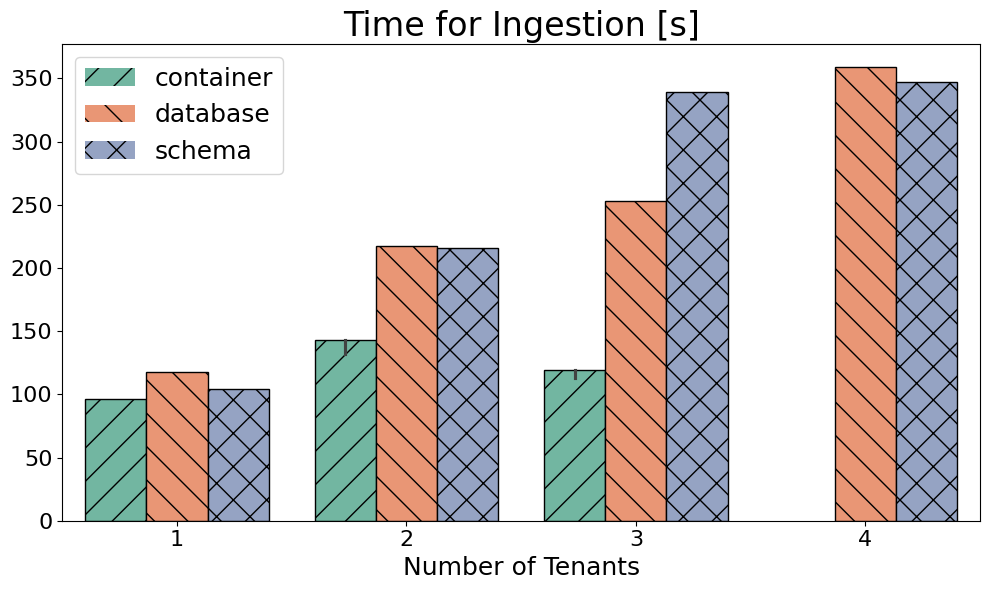

In [42]:
plot_bars(df_performance, y='time_ingest', title='Time for Ingestion [s]', estimator='max')

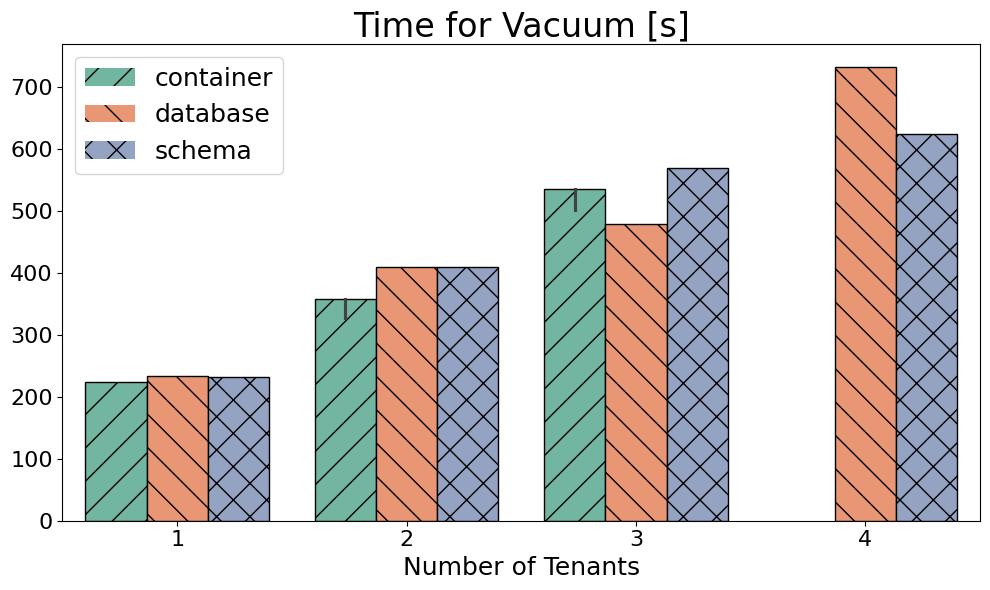

In [43]:
plot_bars(df_performance, y='time_check', title='Time for Vacuum [s]', estimator='max')

## Hardware Benchmarking

In [44]:
df_performance = get_monitoring_stream_all(codes)
df_performance = df_performance[df_performance['client'] == '1']
df_performance

,client,CPU [CPUs],Max RAM [Gb],Max RAM Cached [Gb],Max CPU,CPU Throttled,Locks,pg_locks_count_accessexclusivelock,pg_locks_count_accesssharelock,pg_locks_count_exclusivelock,...,Block Reads,Heap Reads,Heap Hits,Sync Time,Write Time,Number Autoanalyze,Number Autovacuum,Cache Hit Ratio [%],type,num_tenants
0,1,13041.33,10.86,24.11,27.47,0.01,868.29,2.58,276.80,21.53,...,29.0,19.0,551693050.0,0.0,0.0,16000.0,12300.0,100.0,container,1
0,1,22243.48,20.24,45.54,39.36,39.19,1769.35,5.63,573.18,41.70,...,64.0,30.0,888523657.0,0.0,0.0,29100.0,23300.0,100.0,container,2
0,1,20849.00,27.48,48.92,39.00,97.20,2620.14,6.50,840.64,63.76,...,88.0,40.0,927413078.0,0.0,0.0,39200.0,32900.0,100.0,container,3
0,1,10215.90,10.00,20.35,19.37,0.00,917.59,3.18,294.79,20.39,...,20.0,20.0,408638469.0,0.0,0.0,15900.0,11700.0,100.0,database,1
0,1,12357.37,13.01,27.99,28.51,14.99,1827.12,4.46,587.17,42.41,...,25.0,25.0,396588604.0,0.0,0.0,27400.0,19700.0,100.0,database,2
0,1,14888.96,16.25,34.50,35.36,33.75,2737.09,5.93,877.15,62.76,...,20.0,20.0,456155884.0,0.0,0.0,39200.0,29400.0,100.0,database,3
0,1,13726.78,18.60,37.00,33.23,42.13,3548.28,6.44,1129.81,84.44,...,21.0,21.0,352507795.0,0.0,0.0,47300.0,36400.0,100.0,database,4
0,1,10619.66,10.12,20.40,22.76,0.01,921.10,2.72,296.80,20.23,...,32.0,17.0,402492335.0,0.0,0.0,15500.0,11700.0,100.0,schema,1
0,1,10184.00,12.78,25.01,21.62,10.66,1558.20,3.17,500.43,35.26,...,17.0,8.0,316575214.0,0.0,0.0,25600.0,19300.0,100.0,schema,2
0,1,9939.38,14.78,29.31,25.43,22.13,2691.67,5.79,855.59,63.80,...,28.0,19.0,320541152.0,0.0,0.0,31600.0,25100.0,100.0,schema,3


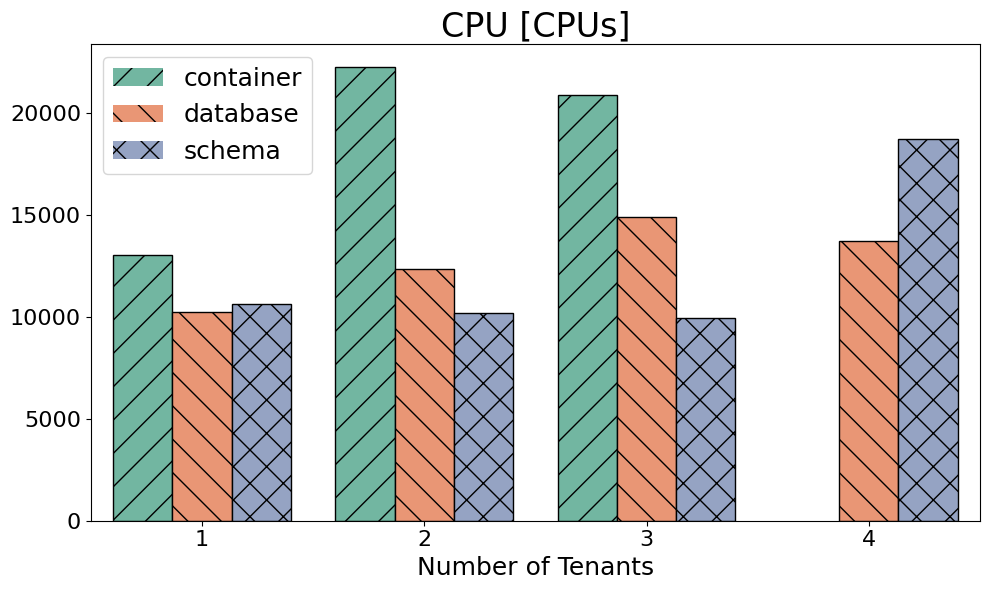

In [45]:
plot_bars(df_performance, y='CPU [CPUs]', title='CPU [CPUs]', estimator='max')

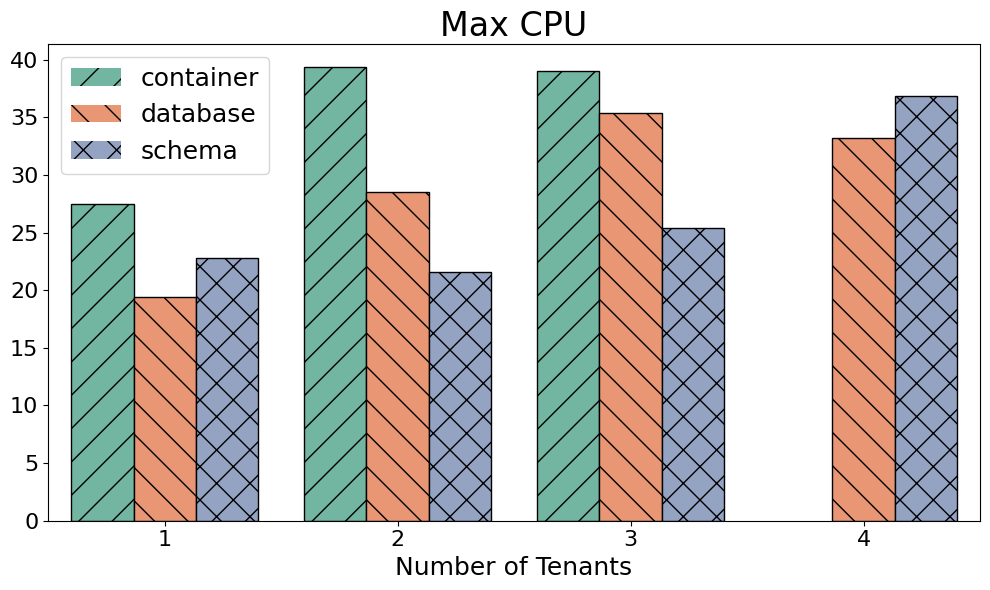

In [46]:
plot_bars(df_performance, y='Max CPU', title='Max CPU', estimator='sum')

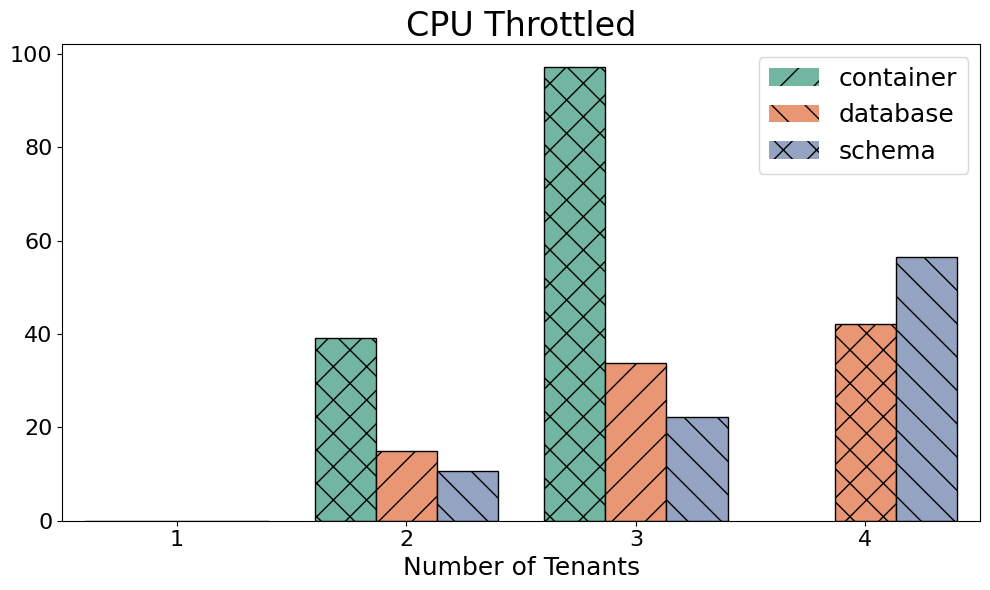

In [47]:
plot_bars(df_performance, y='CPU Throttled', title='CPU Throttled', estimator='sum')

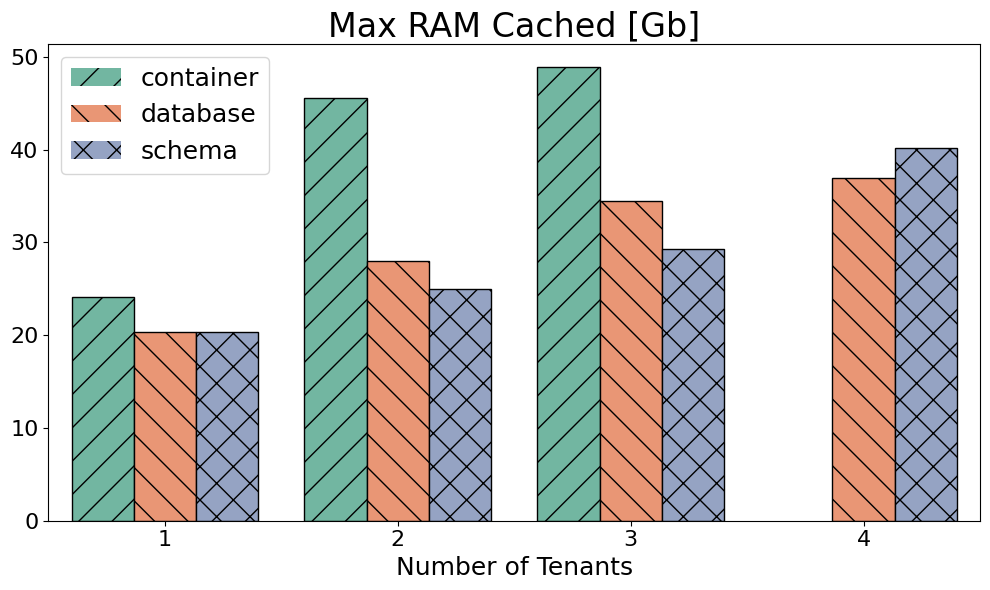

In [48]:
plot_bars(df_performance, y='Max RAM Cached [Gb]', title='Max RAM Cached [Gb]', estimator='sum')

## Hardware Loading

In [49]:
df_performance = get_monitoring_all(codes, "stream")
#df_performance = df_performance[df_performance['client'] == '1']
df_performance

,client,CPU [CPUs],Max RAM [Gb],Max RAM Cached [Gb],Max CPU,CPU Throttled,Locks,pg_locks_count_accessexclusivelock,pg_locks_count_accesssharelock,pg_locks_count_exclusivelock,...,Block Reads,Heap Reads,Heap Hits,Sync Time,Write Time,Number Autoanalyze,Number Autovacuum,Cache Hit Ratio [%],type,num_tenants
0,1,13041.33,10.86,24.11,27.47,0.01,868.29,2.58,276.80,21.53,...,29.0,19.0,551693050.0,0.0,0.0,16000.0,12300.0,100.0,container,1
1,2,13421.22,14.59,33.65,26.71,0.00,915.43,3.07,292.95,19.73,...,18.0,18.0,572817840.0,0.0,0.0,13900.0,10700.0,100.0,container,1
0,1,22243.48,20.24,45.54,39.36,39.19,1769.35,5.63,573.18,41.70,...,64.0,30.0,888523657.0,0.0,0.0,29100.0,23300.0,100.0,container,2
1,2,20971.46,24.93,52.13,38.79,39.80,1730.29,4.50,552.66,42.22,...,21.0,21.0,856002405.0,0.0,0.0,24200.0,20000.0,100.0,container,2
0,1,20849.00,27.48,48.92,39.00,97.20,2620.14,6.50,840.64,63.76,...,88.0,40.0,927413078.0,0.0,0.0,39200.0,32900.0,100.0,container,3
1,2,21092.24,32.21,58.79,39.00,97.29,2598.19,6.63,835.40,64.42,...,18.0,18.0,891069930.0,0.0,0.0,34600.0,29600.0,100.0,container,3
0,1,10215.90,10.00,20.35,19.37,0.00,917.59,3.18,294.79,20.39,...,20.0,20.0,408638469.0,0.0,0.0,15900.0,11700.0,100.0,database,1
1,2,12645.91,13.34,30.90,23.94,0.00,887.32,2.97,286.26,19.73,...,17.0,17.0,518355327.0,0.0,0.0,13700.0,10600.0,100.0,database,1
0,1,12357.37,13.01,27.99,28.51,14.99,1827.12,4.46,587.17,42.41,...,25.0,25.0,396588604.0,0.0,0.0,27400.0,19700.0,100.0,database,2
1,2,11890.59,16.10,33.35,27.67,15.01,1832.79,4.77,587.46,41.92,...,10.0,10.0,375510399.0,0.0,0.0,22700.0,17700.0,100.0,database,2


In [50]:
#plot_bars(df_performance, y='CPU [CPUs]', title='CPU [CPUs]', estimator='max')

In [51]:
#plot_bars(df_performance, y='Max CPU', title='Max CPU', estimator='sum')

In [52]:
#plot_bars(df_performance, y='Max RAM Cached [Gb]', title='Max RAM Cached [Gb]', estimator='sum')

# Efficiency

In [53]:
client = '1'

df_performance_monitoring = get_monitoring_stream_all(codes)
df_performance_monitoring = df_performance_monitoring[df_performance_monitoring['client'] == client]
df_performance = get_performance_all(codes)
df_performance = df_performance[df_performance['client'] == client]
merged_df = pd.merge(df_performance, df_performance_monitoring, on=['type', 'num_tenants'], how='inner')
#merged_df['I_Lat'] = 1./merged_df['E_Lat']
merged_df['E_Tpx'] = merged_df['Goodput (requests/second)'] / merged_df['CPU [CPUs]'] * 600.
merged_df['E_Lat'] = 1./np.sqrt(merged_df['Latency Distribution.Average Latency (microseconds)']*merged_df['CPU [CPUs]']/1E6)
merged_df['E_RAM'] = (merged_df['Goodput (requests/second)']) / merged_df['Max RAM [Gb]']
merged_df

,client_x,Goodput (requests/second),num_errors,Latency Distribution.Average Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),type,num_tenants,client_y,CPU [CPUs],Max RAM [Gb],...,Heap Reads,Heap Hits,Sync Time,Write Time,Number Autoanalyze,Number Autovacuum,Cache Hit Ratio [%],E_Tpx,E_Lat,E_RAM
0,1,6237.663313,104,15753.000000,196150,container,1,1,13041.33,10.86,...,19.0,551693050.0,0.0,0.0,16000.0,12300.0,100.0,286.979778,0.069768,574.370471
1,1,9019.097884,195,21795.000000,91304,container,2,1,22243.48,20.24,...,30.0,888523657.0,0.0,0.0,29100.0,23300.0,100.0,243.282918,0.045417,445.607603
2,1,8294.404559,169,35578.666667,177168,container,3,1,20849.00,27.48,...,40.0,927413078.0,0.0,0.0,39200.0,32900.0,100.0,238.699349,0.036717,301.834227
3,1,4958.168146,95,19811.000000,404564,database,1,1,10215.90,10.00,...,20.0,408638469.0,0.0,0.0,15900.0,11700.0,100.0,291.203016,0.070292,495.816815
4,1,5098.092846,91,38551.500000,628400,database,2,1,12357.37,13.01,...,25.0,396588604.0,0.0,0.0,27400.0,19700.0,100.0,247.532906,0.045816,391.859558
5,1,5610.454813,130,52583.333333,559333,database,3,1,14888.96,16.25,...,20.0,456155884.0,0.0,0.0,39200.0,29400.0,100.0,226.091875,0.035739,345.258758
6,1,4521.146379,96,87124.750000,850717,database,4,1,13726.78,18.60,...,21.0,352507795.0,0.0,0.0,47300.0,36400.0,100.0,197.620114,0.028916,243.072386
7,1,5020.004877,126,19560.000000,418214,schema,1,1,10619.66,10.12,...,17.0,402492335.0,0.0,0.0,15500.0,11700.0,100.0,283.625175,0.069384,496.047913
8,1,3934.224846,93,49948.500000,943736,schema,2,1,10184.00,12.78,...,8.0,316575214.0,0.0,0.0,25600.0,19300.0,100.0,231.788581,0.044338,307.842320
9,1,3840.009730,90,76890.333333,944205,schema,3,1,9939.38,14.78,...,19.0,320541152.0,0.0,0.0,31600.0,25100.0,100.0,231.805790,0.036173,259.811213


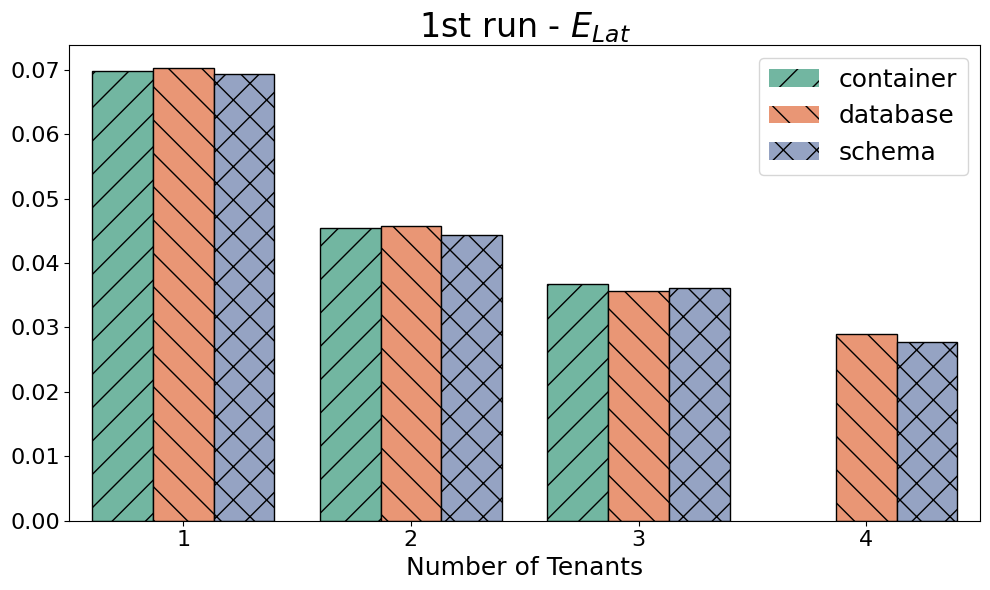

In [54]:
plot_bars(merged_df, y='E_Lat', title='1st run - $E_{Lat}$', estimator='max')

In [55]:
#plot_bars(merged_df, y='I_Lat', title='1st run - $I_{Lat}$', estimator='max')

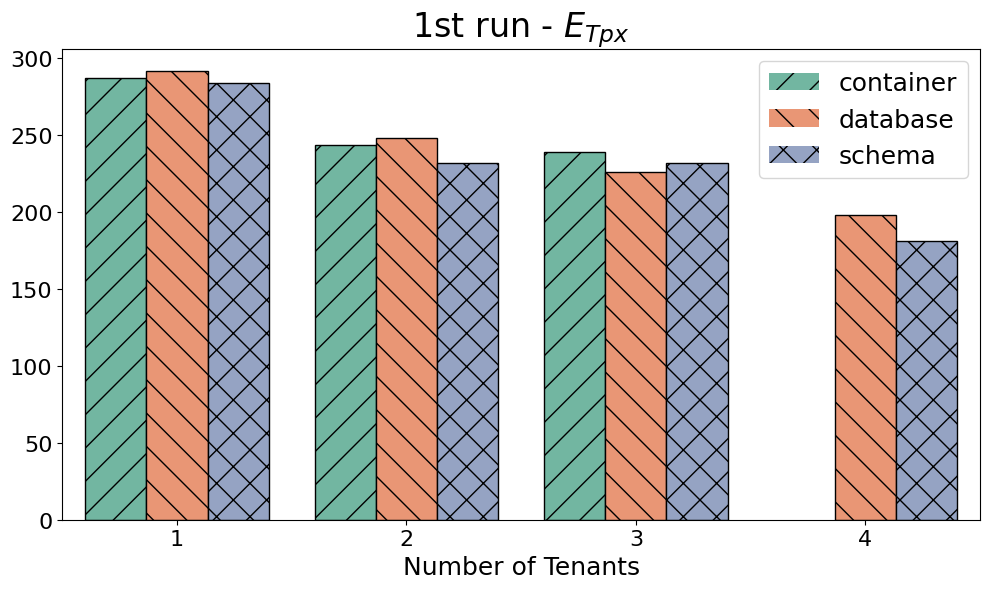

In [56]:
plot_bars(merged_df, y='E_Tpx', title='1st run - $E_{Tpx}$', estimator='max')

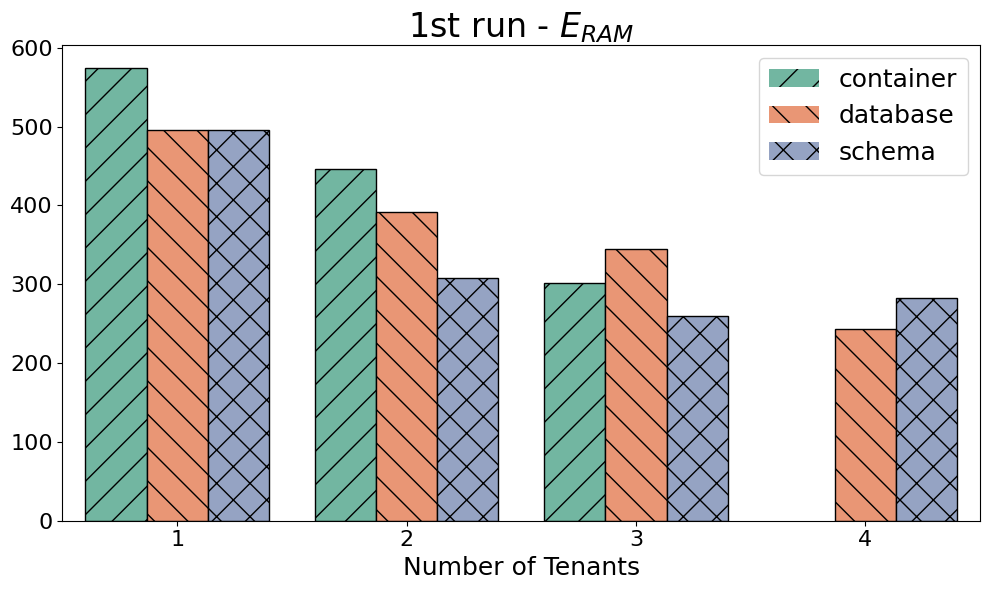

In [57]:
plot_bars(merged_df, y='E_RAM', title='1st run - $E_{RAM}$', estimator='min')

In [58]:
client = '2'

df_performance_monitoring = get_monitoring_stream_all(codes)
df_performance_monitoring = df_performance_monitoring[df_performance_monitoring['client'] == client]
df_performance = get_performance_all(codes)
df_performance = df_performance[df_performance['client'] == client]
merged_df = pd.merge(df_performance, df_performance_monitoring, on=['type', 'num_tenants'], how='inner')
#merged_df['CPUs/Request'] = merged_df['CPU [CPUs]'] / merged_df['Goodput (requests/second)'] / 600.
merged_df['E_Tpx'] = merged_df['Goodput (requests/second)'] / merged_df['CPU [CPUs]'] * 600.
merged_df['E_Lat'] = 1./np.sqrt(merged_df['Latency Distribution.Average Latency (microseconds)']*merged_df['CPU [CPUs]']/1E6)
merged_df['E_RAM'] = (merged_df['Goodput (requests/second)']) / merged_df['Max RAM [Gb]']

merged_df

,client_x,Goodput (requests/second),num_errors,Latency Distribution.Average Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),type,num_tenants,client_y,CPU [CPUs],Max RAM [Gb],...,Heap Reads,Heap Hits,Sync Time,Write Time,Number Autoanalyze,Number Autovacuum,Cache Hit Ratio [%],E_Tpx,E_Lat,E_RAM
0,2,6531.671431,134,15040.000000,132481,container,1,2,13421.22,14.59,...,18.0,572817840.0,0.0,0.0,13900.0,10700.0,100.0,292.000493,0.070385,447.681387
1,2,8735.512692,162,22503.500000,94091,container,2,2,20971.46,24.93,...,21.0,856002405.0,0.0,0.0,24200.0,20000.0,100.0,249.925738,0.046032,350.401632
2,2,8272.002796,189,35675.666667,178318,container,3,2,21092.24,32.21,...,18.0,891069930.0,0.0,0.0,34600.0,29600.0,100.0,235.309369,0.036455,256.814741
3,2,6102.711316,128,16100.000000,214743,database,1,2,12645.91,13.34,...,17.0,518355327.0,0.0,0.0,13700.0,10600.0,100.0,289.550281,0.070083,457.474611
4,2,4686.638069,115,41942.000000,677183,database,2,2,11890.59,16.10,...,10.0,375510399.0,0.0,0.0,22700.0,17700.0,100.0,236.488084,0.044779,291.095532
5,2,5592.457977,120,52780.666667,571593,database,3,2,16555.62,20.32,...,9.0,466000881.0,0.0,0.0,34000.0,26500.0,100.0,202.678896,0.033829,275.219389
6,2,4905.503074,98,80255.250000,815337,database,4,2,15182.43,22.39,...,10.0,395840155.0,0.0,0.0,41000.0,32300.0,100.0,193.862369,0.028648,219.093483
7,2,4815.684902,79,20402.000000,440864,schema,1,2,10524.92,12.86,...,8.0,389685166.0,0.0,0.0,13300.0,10000.0,100.0,274.530442,0.068242,374.470055
8,2,3664.819796,85,53638.500000,932267,schema,2,2,9544.04,14.56,...,7.0,298311812.0,0.0,0.0,20800.0,16500.0,100.0,230.394244,0.044197,251.704656
9,2,4493.684630,112,65763.333333,820150,schema,3,2,13498.73,18.58,...,15.0,380376706.0,0.0,0.0,27800.0,23900.0,100.0,199.738107,0.033563,241.856008


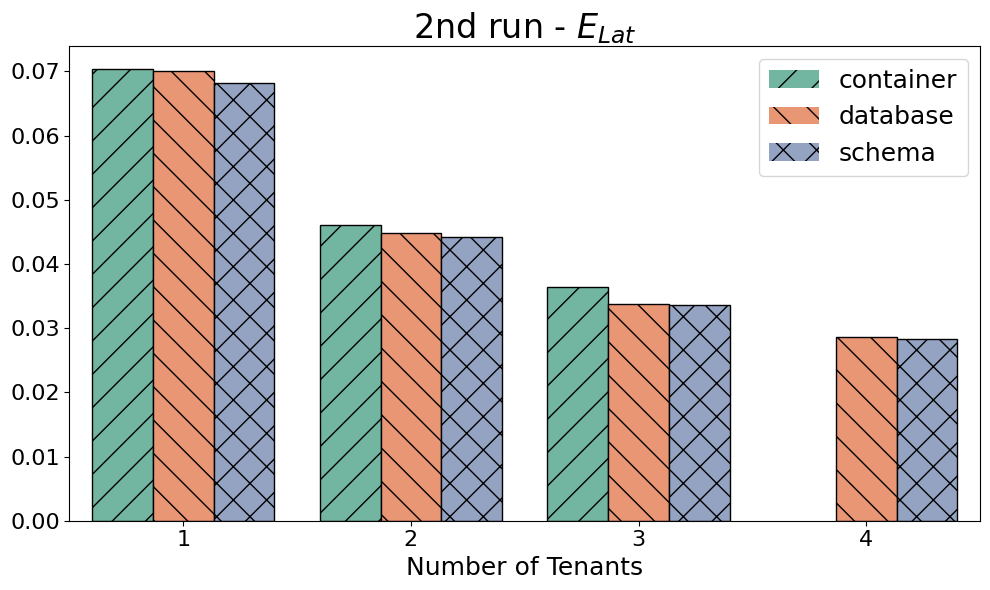

In [59]:
plot_bars(merged_df, y='E_Lat', title='2nd run - $E_{Lat}$', estimator='max')

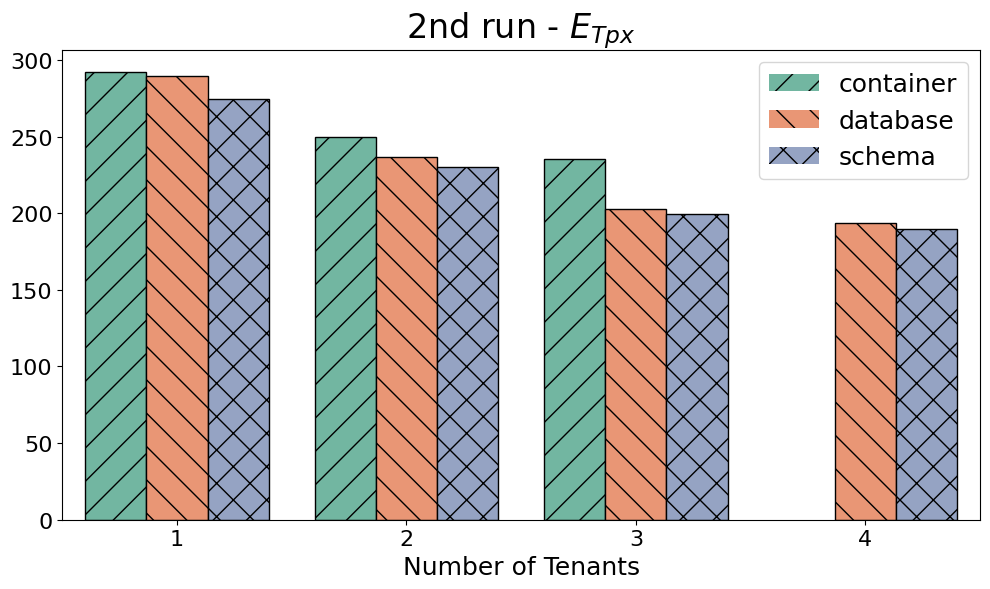

In [60]:
plot_bars(merged_df, y='E_Tpx', title='2nd run - $E_{Tpx}$', estimator='max')

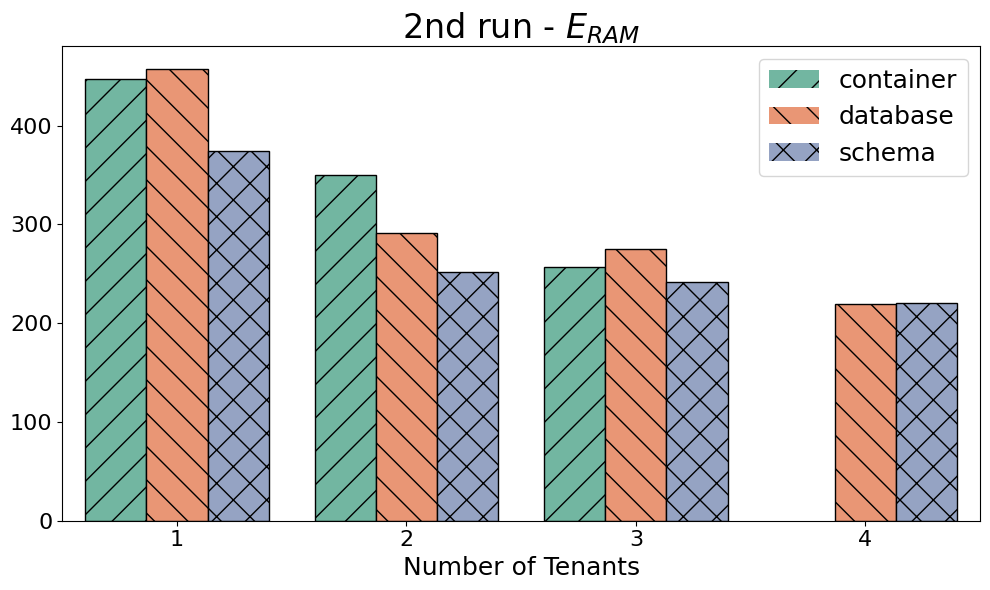

In [61]:
plot_bars(merged_df, y='E_RAM', title='2nd run - $E_{RAM}$', estimator='max')

In [62]:
import os
import zipfile

def zip_all_results():
    # Set the base directory containing the folders
    base_dir = path # "/path/to/your/folders"  # CHANGE THIS to your actual directory
    # List all folder names in the directory
    folder_names = codes
    # Create a zip for each folder
    for folder in folder_names:
        folder_path = os.path.join(base_dir, folder)
        zip_path = os.path.join(base_dir, f"{folder}.zip")
        print(f"Zipping {folder_path} to {zip_path}...")
        with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
            for root, _, files in os.walk(folder_path):
                for file in files:
                    abs_path = os.path.join(root, file)
                    rel_path = os.path.relpath(abs_path, folder_path)
                    zipf.write(abs_path, arcname=os.path.join(folder, rel_path))
    print("✅ Done zipping all folders.")


In [63]:
#zip_all_results()